<a href="https://colab.research.google.com/github/codernona/Fasta_scan/blob/main/Analysis_of_the_heart_disease_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("car")
install.packages("readxl")
install.packages ("psych")
install.packages("jmv")
install.packages("VIM")
install.packages("mice")
install.packages("dlookr")
install.packages("kableExtra")


In [ ]:
install.packages("ggpubr")

In [ ]:
install.packages("ggplot2")

In [ ]:
library (car)
library (readxl)
library(psych)
library(jmv)
library (VIM)
library (mice)
library(tidyverse)
library(kableExtra)
library (ggplot2)
library (ggpubr)
library (ggplot2)


# **ANALYSIS OF THE HEART DISEASE DATASET**

In [ ]:
# Load data
first_data_set <- read.csv(file = 'heart_disease_dataset.csv', header = TRUE, sep = " ")

# Removing patient id feature
data_set <- first_data_set[,-15]

# changing name of the predicted attribute
names(data_set)[14] <- "heartdisease"

# convert missing data chr "?" to "NA"
data_set[data_set == "?"] <- NA

# Showing the first lines of the file
head (data_set)

This data comes from the Cleveland Clinic Foundation original dataset. From this data we expect to find a relationship between the target variable, 
which is the diagnosis of the heart disease, and some of the other variables this dataset contains in order to be able to predict if a person has heart disease based on certain factors.

Each observation in this dataset represents a person’s health history, including their age, sex, cholesterol levels, etc. As we can see below, the dataset includes a total of 303 observations and 14 different features of categorical and continous values.

- Dataset shape



In [ ]:
cat ("Shape of the dataset: \n")

cat("Number of Features:",ncol(data_set), "\n")

cat("Number of Observations:",nrow(data_set))

Shape of the dataset: 
Number of Features: 14 
Number of Observations: 303

- Checking and modifying the data type of each feature

In [ ]:
# convert ca variable to int
data_set$ca <- as.integer(data_set$ca)

# convert variables (sex,cp,fbs,restecg,exang,slope,heartdisease) to factors
int_to_fact_var <- c(2,3,6,7,9,11,13,14)
data_set[,int_to_fact_var] <- lapply(data_set[,int_to_fact_var] , factor)

# reclassification of variable heartdisease to a factor with 2 levels (0 = absence ; 1 = presence)
levels(data_set$heartdisease) <- c("0", "1", "1", "1", "1")

In [ ]:
str(data_set)

'data.frame':	303 obs. of  14 variables:
 $ age         : int  63 67 67 37 41 56 62 57 63 53 ...
 $ sex         : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 1 1 2 2 ...
 $ cp          : Factor w/ 4 levels "1","2","3","4": 1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps    : int  145 160 120 130 130 120 140 120 130 140 ...
 $ chol        : int  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs         : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 2 ...
 $ restecg     : Factor w/ 3 levels "0","1","2": 3 3 3 1 3 1 3 1 3 3 ...
 $ thalach     : int  150 108 129 187 172 178 160 163 147 155 ...
 $ exang       : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 2 1 2 ...
 $ oldpeak     : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope       : Factor w/ 3 levels "1","2","3": 3 2 2 3 1 1 3 1 2 3 ...
 $ ca          : int  0 3 2 0 0 0 2 0 1 0 ...
 $ thal        : Factor w/ 3 levels "3","6","7": 2 1 3 1 1 1 1 1 3 3 ...
 $ heartdisease: Factor w/ 2 levels "0","1": 1 2 2 1 1 1 2 1 2 2 ...


In [ ]:
# showing a table once applied those modifications to explain the description, data type, and the value of each feature
read_excel("description_data.xls")

ERROR: ignored

**UNIVARIATE ANALYSIS**

**1. For categorical variables**

>>- Non-graphical EDA

In [ ]:
categorical_vars <- dplyr::select_if(data_set, is.factor)
summary(categorical_vars)

 sex     cp      fbs     restecg exang   slope     thal     heartdisease
 0: 97   1: 23   0:258   0:151   0:204   1:142   3   :166   0:164       
 1:206   2: 50   1: 45   1:  4   1: 99   2:140   6   : 18   1:139       
         3: 86           2:148           3: 21   7   :117               
         4:144                                   NA's:  2               

>> - Graphical EDA

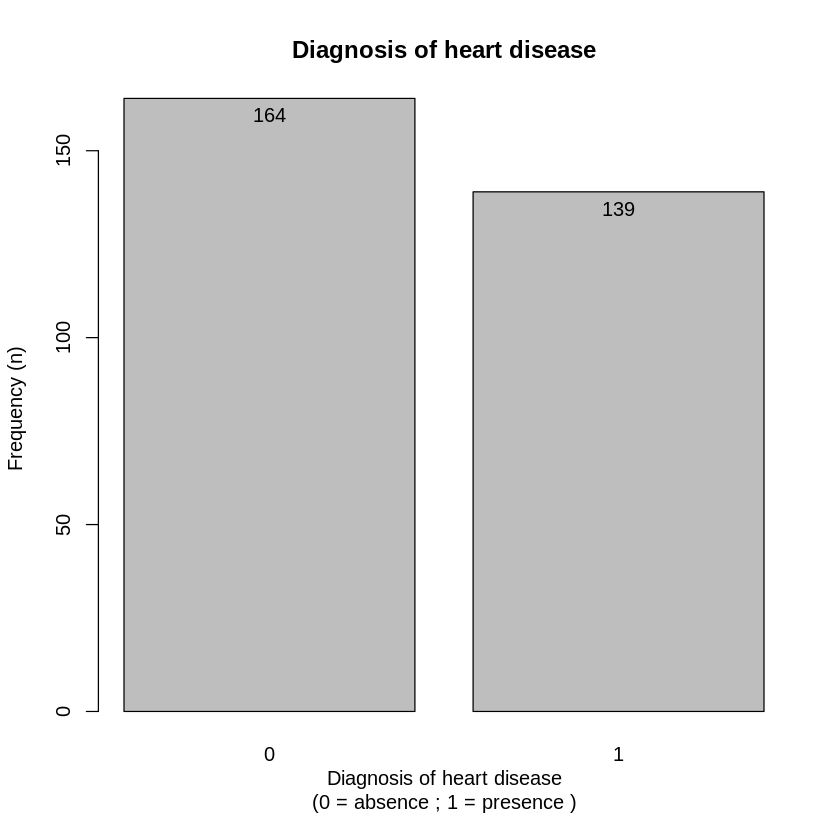

In [ ]:
# heartdisease (Diagnosis of heart disease)
heartdisease_counts <- table(data_set$heartdisease)
barplot_heartdisease <- barplot(heartdisease_counts, main= "Diagnosis of heart disease",
xlab = "Diagnosis of heart disease\n(0 = absence ; 1 = presence )",
ylab = "Frequency (n)")
text(barplot_heartdisease, heartdisease_counts, heartdisease_counts, font = 1, col = "black" , pos = 1)

The number of healthy people is higher than the number of unhealthy people. Even so, the difference is not very large, and therefore we have a large enough sample of both cases to be able to draw conclusions.


Regarding the visualization of the distribution of the predictor categorical variables, we considered that it made more sense to only consider sick patients in order to be able to obtain conclusions about the behavior of the different features in patients with heart disease.

So we select from the whole data set the subset of the patients that have heart disease (i.e. heartdisease = 1). From below bar plots, we can notice that male seem to be more likely to get heart disease than women. Also, most heart disease patients of the dataset do not feel chest pain and have a fasting blood sugar value below 120 mg/dl. However, more than 55% of them have a probable or definite left ventricular hypertrophy by Estres’ criteria and a reversable defect regarding thalassemia.

Subsequent analyzes taking into account more than one variable (Bivariate EDA) will allow us to increase the credibility of these conclusions


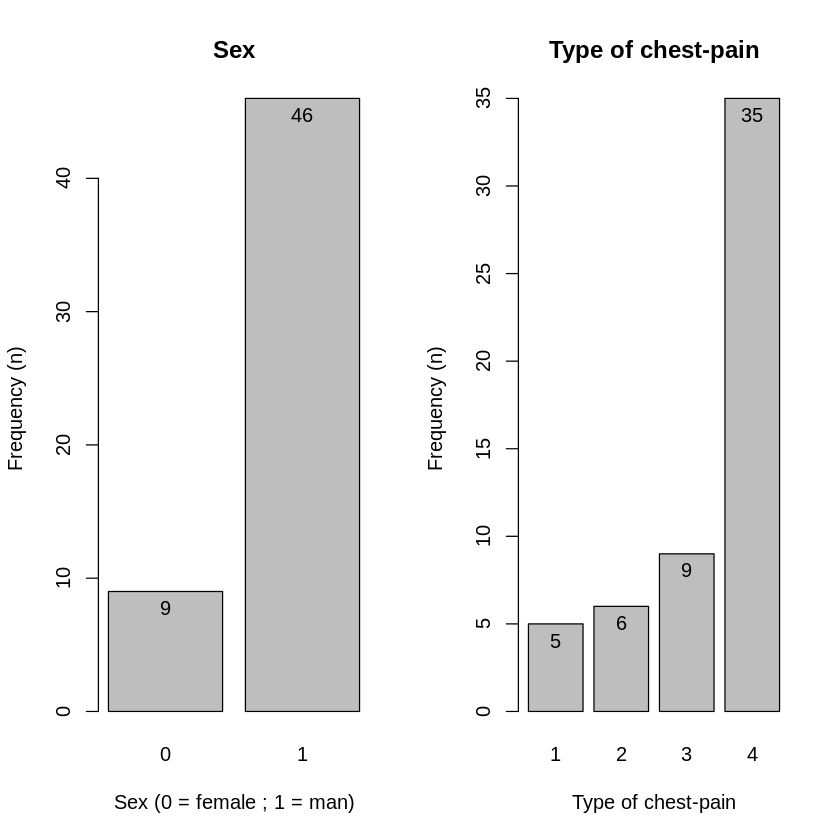

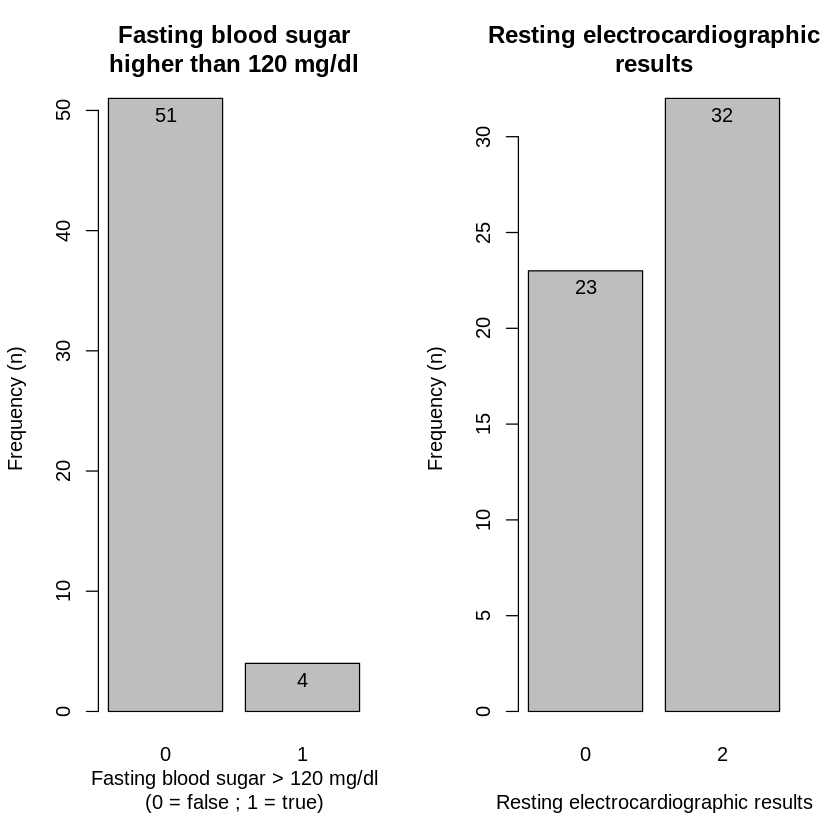

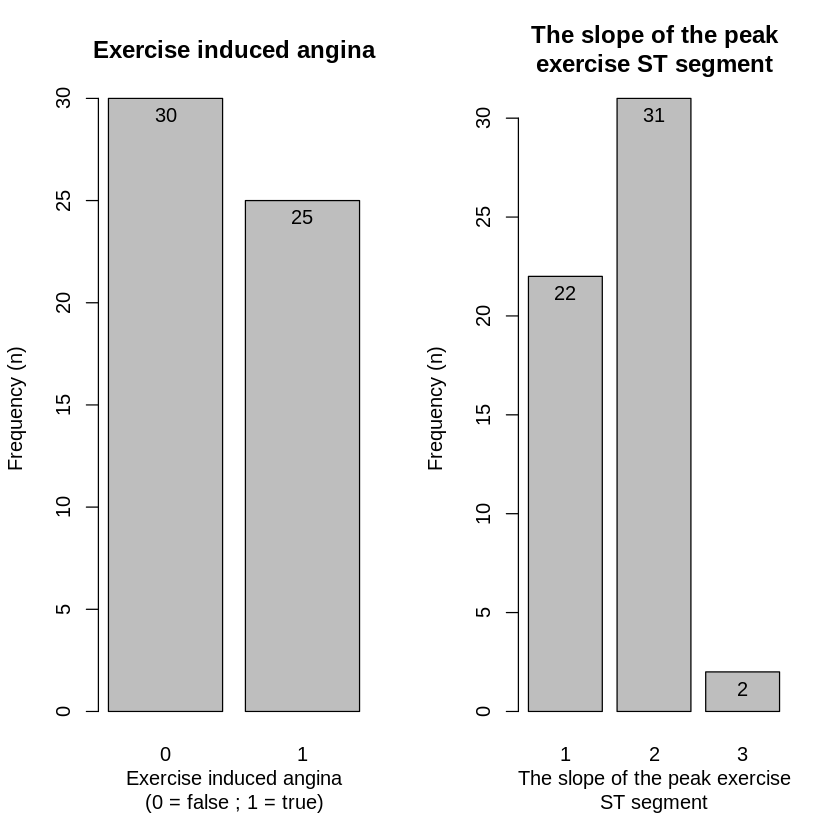

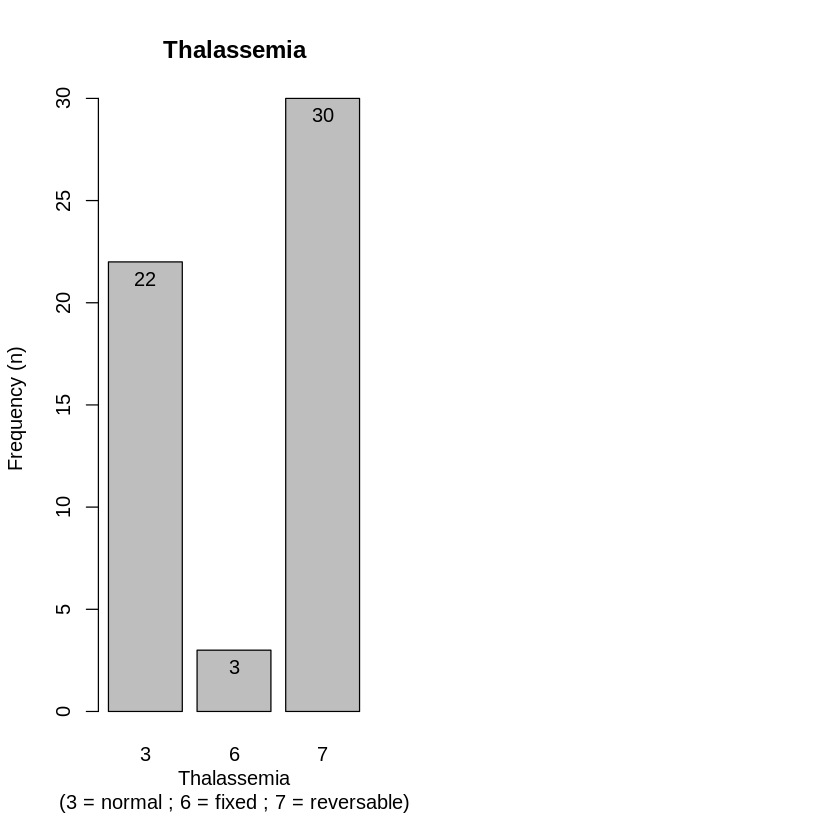

In [ ]:
# sex
par(mfrow=c(1,2))
sex_counts <- table(data_set$sex[data_set$heartdisease == 1])
barplot_sex <- barplot(sex_counts, main="Sex",
xlab = "Sex (0 = female ; 1 = man)",
ylab = "Frequency (n)")
text(barplot_sex, sex_counts, sex_counts, font = 1, col = "black" , pos = 1)

# cp (Type of chest-pain)
cp_counts <- table(data_set$cp[data_set$heartdisease == 1])
barplot_cp <- barplot(cp_counts, main= "Type of chest-pain",
xlab = "Type of chest-pain",
ylab = "Frequency (n)")
text(barplot_cp, cp_counts, cp_counts, font = 1, col = "black" , pos = 1)

# fbs (Fasting blood sugar higher than 120 mg/dl)
par(mfrow=c(1,2))
fbs_counts <- table(data_set$fbs[data_set$heartdisease == 1])
barplot_fbs <- barplot(fbs_counts, main= "Fasting blood sugar\nhigher than 120 mg/dl",
xlab = "Fasting blood sugar > 120 mg/dl\n(0 = false ; 1 = true)",
ylab = "Frequency (n)")
text(barplot_fbs, fbs_counts, fbs_counts, font = 1, col = "black" , pos = 1)

# restecg (Resting electrocardiographic results)
restecg_counts <- table(data_set$restecg[data_set$heartdisease == 1])
barplot_restecg <- barplot(restecg_counts, main= "Resting electrocardiographic\nresults",
xlab = "Resting electrocardiographic results",
ylab = "Frequency (n)")
text(barplot_restecg, restecg_counts, restecg_counts, font = 1, col = "black" , pos = 1)

# exang (Exercise induced angina)
par(mfrow=c(1,2))
exang_counts <- table(data_set$exang[data_set$heartdisease == 1])
barplot_exang <- barplot(exang_counts, main= "Exercise induced angina",
xlab = "Exercise induced angina\n(0 = false ; 1 = true)",
ylab = "Frequency (n)")
text(barplot_exang, exang_counts, exang_counts, font = 1, col = "black" , pos = 1)

# slope (The slope of the peak exercise ST segment)
slope_counts <- table(data_set$slope[data_set$heartdisease == 1])
barplot_slope <- barplot(slope_counts, main= "The slope of the peak\nexercise ST segment",
xlab = "The slope of the peak exercise\nST segment",
ylab = "Frequency (n)")
text(barplot_slope, slope_counts, slope_counts, font = 1, col = "black" , pos = 1)

# thal (Thalassemia) 
par(mfrow=c(1,2))
thal_counts <- table(data_set$thal[data_set$heartdisease == 1])
barplot_thal <- barplot(thal_counts, main= "Thalassemia",
xlab = "Thalassemia\n(3 = normal ; 6 = fixed ; 7 = reversable)",
ylab = "Frequency (n)")
text(barplot_thal, thal_counts, thal_counts, font = 1, col = "black" , pos = 1)


**2. For numerical variables**

>>- Non-graphical EDA

In [ ]:
numeric_vars <- dplyr::select_if(data_set, is.numeric)
summary(numeric_vars)

      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :1.000   Min.   : 94.0  
 1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:3.000   1st Qu.:120.0  
 Median :56.00   Median :1.0000   Median :3.000   Median :130.0  
 Mean   :54.44   Mean   :0.6799   Mean   :3.158   Mean   :131.7  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:4.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :4.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :241.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.7   Mean   :0.1485   Mean   :0.9901   Mean   :149.6  
 3rd Qu.:275.0   3rd Qu.:0.0000   3rd Qu.:2.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope        heartdisease   
 Mi

Since we are comparing people with the presence or absence of heart diseases, we are going to compute the mean between the numerical variables splitting them between the presence and the absence of a heart disease.

In [ ]:
data_set %>%
  group_by(heartdisease) %>%
  summarize(mean_age = mean(age))

data_set %>%
  group_by(heartdisease) %>%
  summarize(mean_trestbps = mean(trestbps))

data_set %>%
  group_by(heartdisease) %>%
  summarize(mean_chol = mean(chol))

data_set %>%
  group_by(heartdisease) %>%
  summarize(mean_thalach = mean(thalach))

data_set %>%
  group_by(heartdisease) %>%
  summarize(mean_oldpeak = mean(oldpeak))

data_set %>%
  group_by(heartdisease) %>%
  summarize(mean_ca = mean(ca))


heartdisease mean_age
1 0            52.58537
2 1            55.38182
3 2            58.02778
4 3            56.00000
5 4            59.69231

heartdisease mean_trestbps
1 0            129.2500     
2 1            133.2545     
3 2            134.1944     
4 3            135.4571     
5 4            138.7692

heartdisease mean_chol
1 0            242.6402 
2 1            249.1091 
3 2            259.2778 
4 3            246.4571 
5 4            253.3846

heartdisease mean_thalach
1 0            158.3780    
2 1            145.9273    
3 2            135.5833    
4 3            132.0571    
5 4            140.6154

heartdisease mean_oldpeak
1 0            0.5865854   
2 1            1.0054545   
3 2            1.7805556   
4 3            1.9628571   
5 4            2.3615385

Warning message in mean.default(ca):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(ca):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(ca):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(ca):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(ca):
“argument is not numeric or logical: returning NA”


heartdisease mean_ca
1 0            NA     
2 1            NA     
3 2            NA     
4 3            NA     
5 4            NA

>> - Graphical EDA

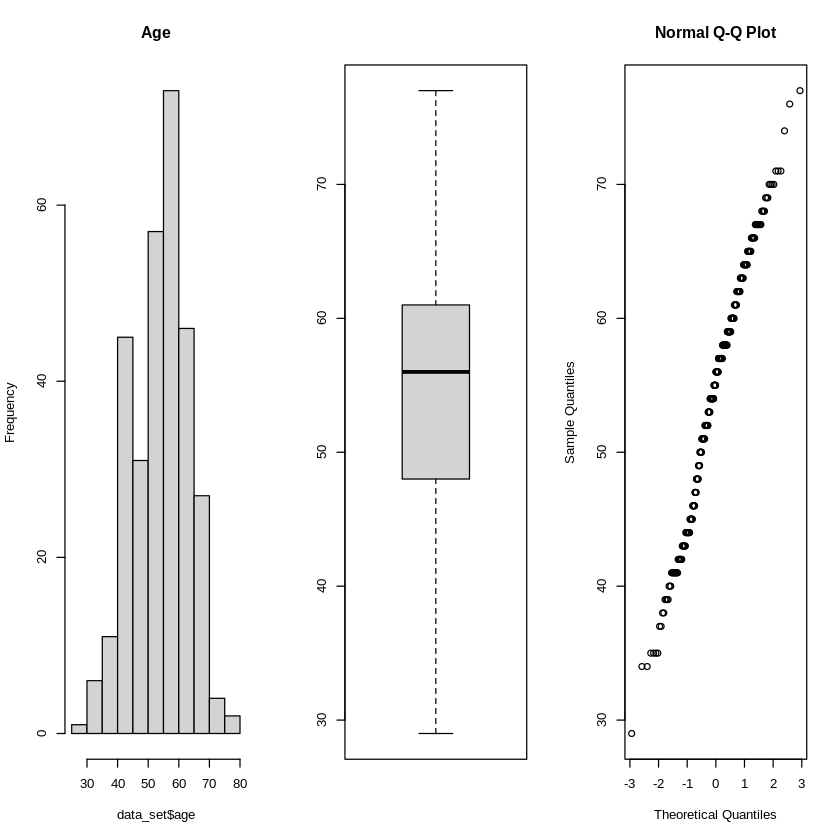

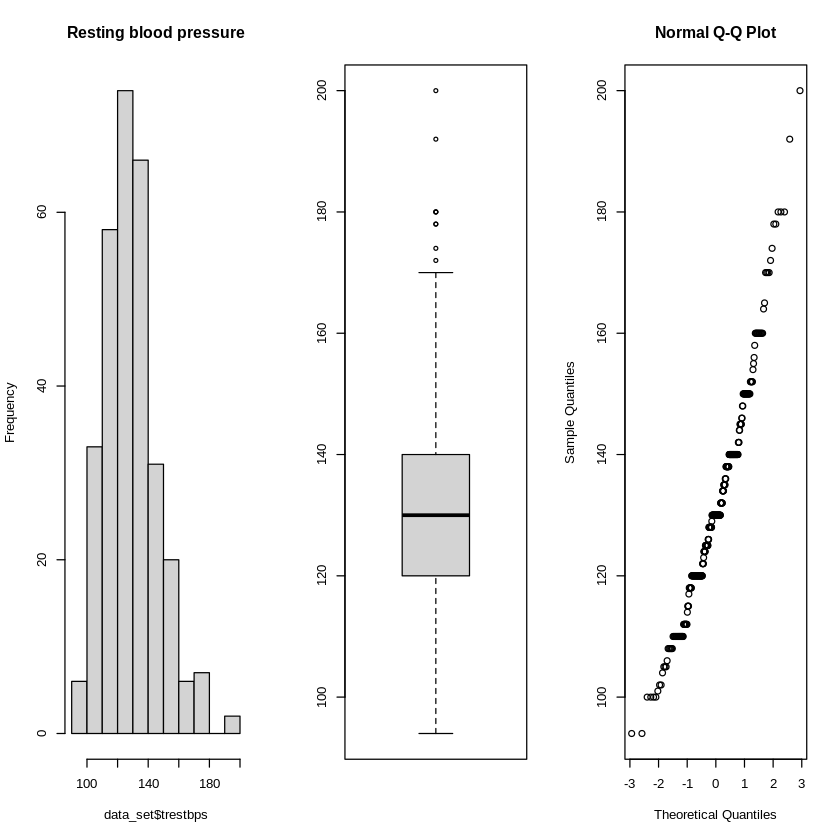

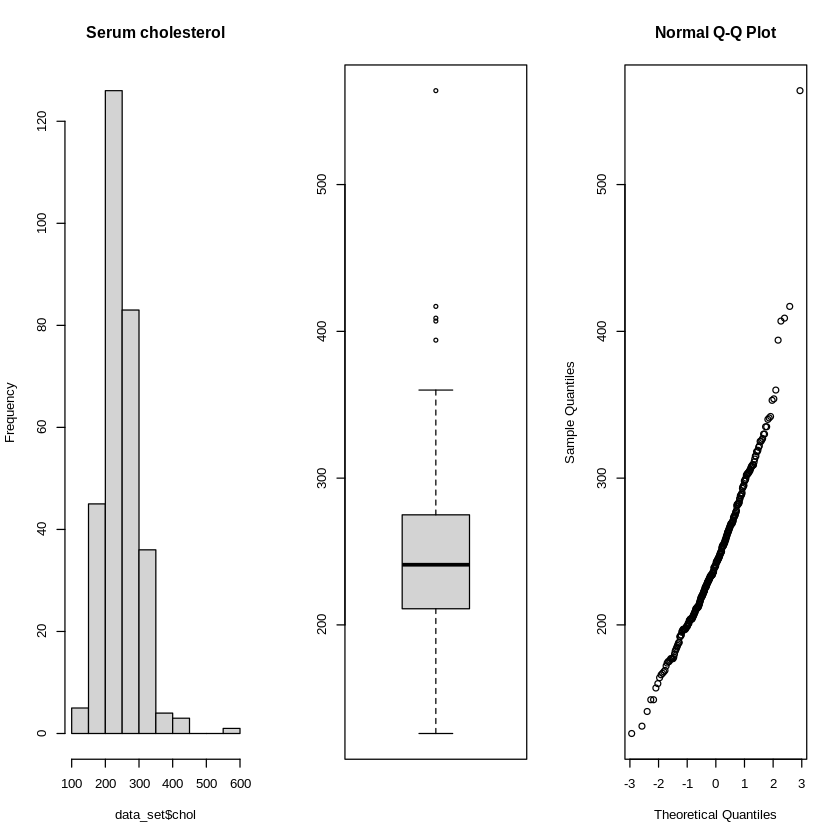

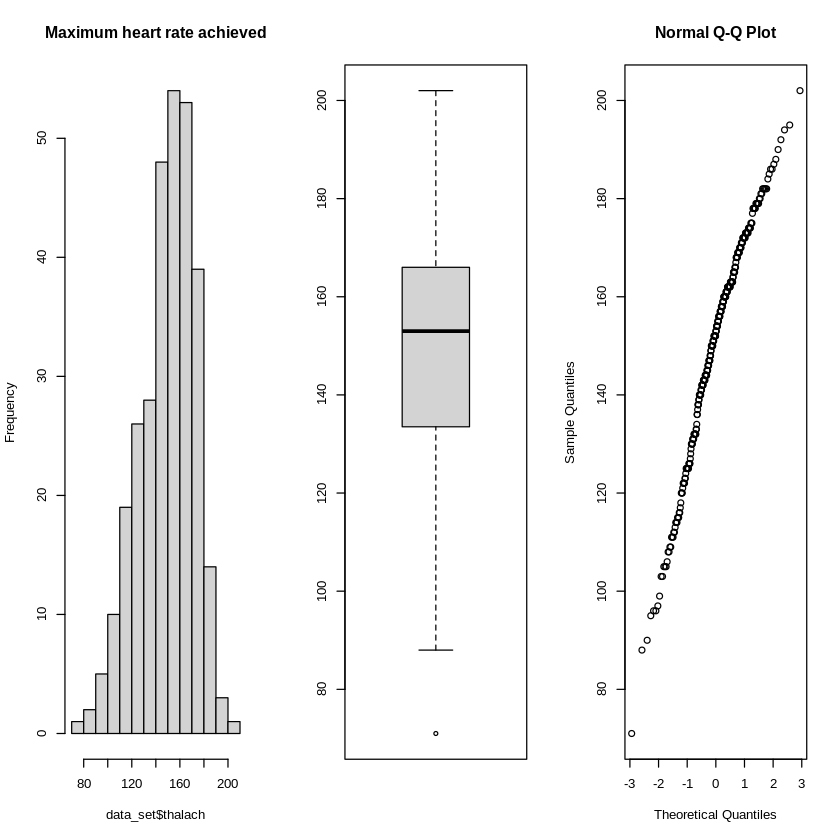

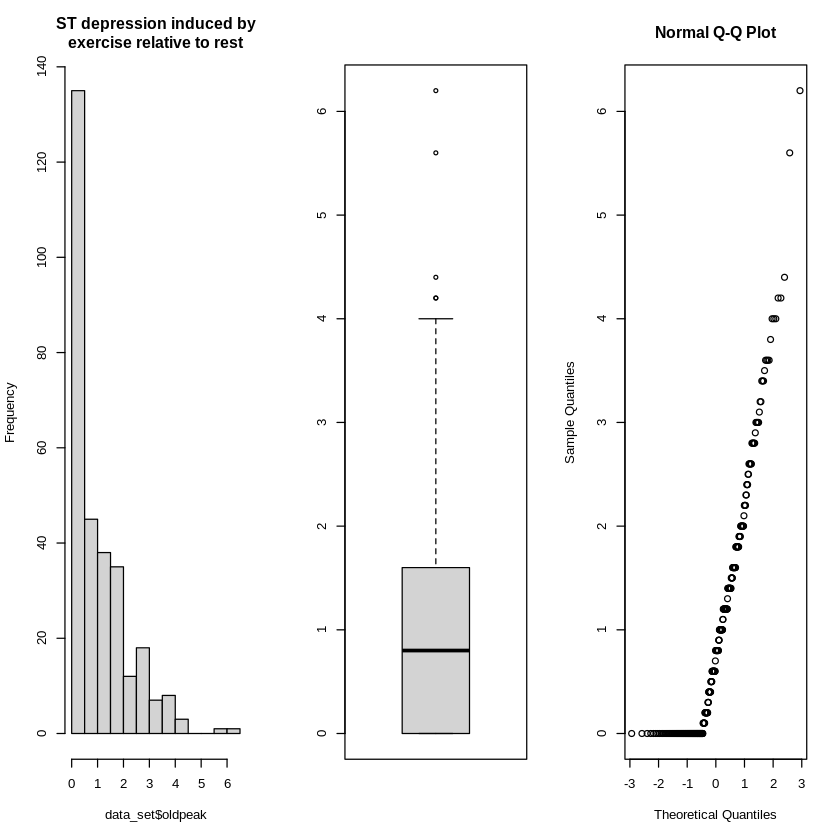

In [ ]:
# age
par(mfrow=c(1,3))
hist(data_set$age, main = "Age")
boxplot(data_set$age)
qqnorm(data_set$age)

# trestbps
par(mfrow=c(1,3))
hist(data_set$trestbps, main = "Resting blood pressure")
boxplot(data_set$trestbps)
qqnorm(data_set$trestbps) # No sé com donar els valors dels outliers

# chol
par(mfrow=c(1,3))
hist(data_set$chol, main = "Serum cholesterol")
boxplot(data_set$chol)
qqnorm(data_set$chol)

# thalach
par(mfrow=c(1,3))
hist(data_set$thalach, main = "Maximum heart rate achieved")
boxplot(data_set$thalach)
qqnorm(data_set$thalach)

# oldpeak
par(mfrow=c(1,3))
hist(data_set$oldpeak, main = "ST depression induced by\nexercise relative to rest")
boxplot(data_set$oldpeak)
qqnorm(data_set$oldpeak)


The summaries shown above allow us to detect the presence of some missing data.
In addition, we can detect some outliers in the graphs for numerical variables.
So the next step is handling these specific cases.

 **DATA CLEANING**

>>**1. THE MISSING DATA**

In [ ]:
# Handling the missing data

sum(is.na(data_set))

[1] 6

Specifically, this dataset contains 6 null or missing value, which consist on less than 2% of the data. We decided to impute those (i.e.replacing a missing value with a substituted, “best guess” value) taking advantage of the mice package.



age          sex           cp     trestbps         chol          fbs 
           0            0            0            0            0            0 
     restecg      thalach        exang      oldpeak        slope           ca 
           0            0            0            0            0            4 
        thal heartdisease 
           2            0


 Variables sorted by number of missings: 
     Variable      Count
           ca 0.01320132
         thal 0.00660066
          age 0.00000000
          sex 0.00000000
           cp 0.00000000
     trestbps 0.00000000
         chol 0.00000000
          fbs 0.00000000
      restecg 0.00000000
      thalach 0.00000000
        exang 0.00000000
      oldpeak 0.00000000
        slope 0.00000000
 heartdisease 0.00000000
         age          sex           cp     trestbps         chol          fbs 
           0            0            0            0            0            0 
     restecg      thalach        exang      oldpeak        slope           ca 
           0            0            0            0            0            4 
        thal heartdisease 
           2            0 


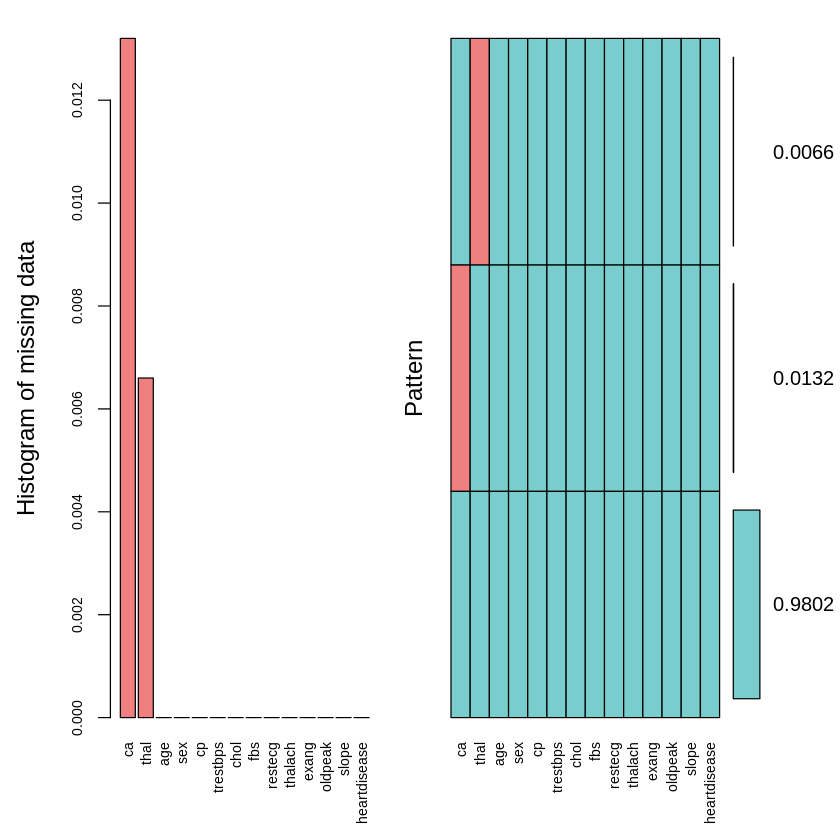

In [ ]:
sapply(data_set, function(x) sum(is.na(x)))

aggr_plot <- aggr(data_set, col=c('#79CDCD','#F08080'), numbers=TRUE, sortVars=TRUE, labels=names(data), cex.axis=.7, gap=3, ylab=c("Histogram of missing data","Pattern"))

table_A <- as.table(sapply(data_set, function(x) sum(is.na(x))))

show (table_A)


From the table above we can see that the variables with missing values are ca (with four missing values) and thal (with two missing values).



 iter imp variable
  1   1  ca  thal
  1   2  ca  thal
  1   3  ca  thal
  1   4  ca  thal
  1   5  ca  thal
  2   1  ca  thal
  2   2  ca  thal
  2   3  ca  thal
  2   4  ca  thal
  2   5  ca  thal
  3   1  ca  thal
  3   2  ca  thal
  3   3  ca  thal
  3   4  ca  thal
  3   5  ca  thal
  4   1  ca  thal
  4   2  ca  thal
  4   3  ca  thal
  4   4  ca  thal
  4   5  ca  thal
  5   1  ca  thal
  5   2  ca  thal
  5   3  ca  thal
  5   4  ca  thal
  5   5  ca  thal
  6   1  ca  thal
  6   2  ca  thal
  6   3  ca  thal
  6   4  ca  thal
  6   5  ca  thal
  7   1  ca  thal
  7   2  ca  thal
  7   3  ca  thal
  7   4  ca  thal
  7   5  ca  thal
  8   1  ca  thal
  8   2  ca  thal
  8   3  ca  thal
  8   4  ca  thal
  8   5  ca  thal
  9   1  ca  thal
  9   2  ca  thal
  9   3  ca  thal
  9   4  ca  thal
  9   5  ca  thal
  10   1  ca  thal
  10   2  ca  thal
  10   3  ca  thal
  10   4  ca  thal
  10   5  ca  thal
  11   1  ca  thal
  11   2  ca  thal
  11   3  ca  thal
  11   4  ca  thal

1 2 3 4 5
88  3 3 3 3 3
267 7 7 7 7 7


 Variables sorted by number of missings: 
     Variable Count
          age     0
          sex     0
           cp     0
     trestbps     0
         chol     0
          fbs     0
      restecg     0
      thalach     0
        exang     0
      oldpeak     0
        slope     0
           ca     0
         thal     0
 heartdisease     0


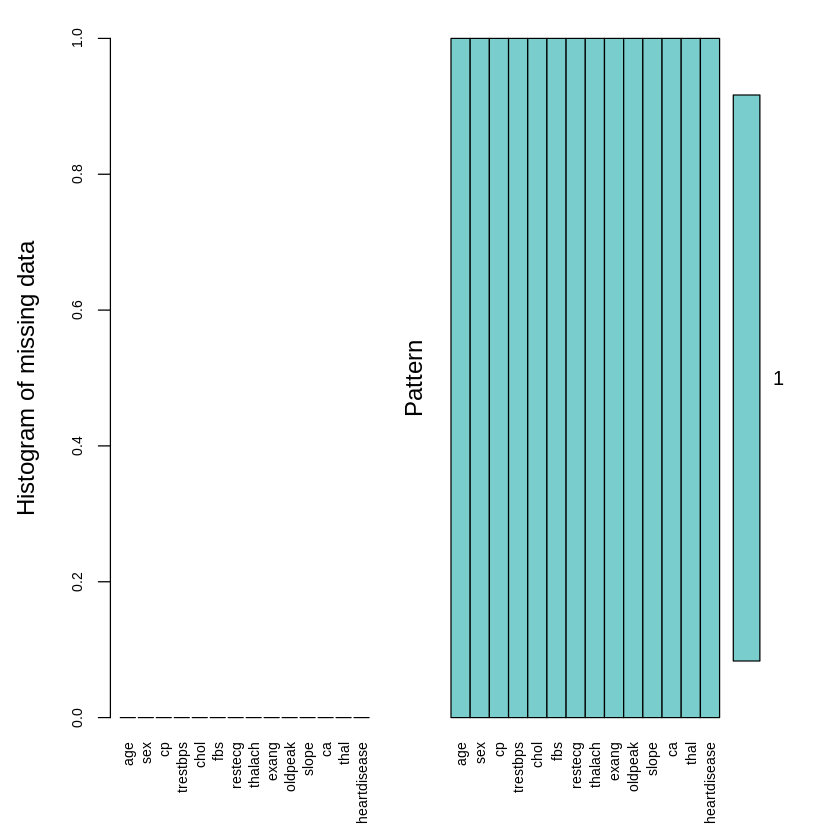

In [ ]:
init = mice(data_set, maxit=0) 
meth = init$method
predM = init$predictorMatrix
 
meth[c("ca")]="ppm" # We will perform a ppm method, since it is the most used one for missing data.
meth[c("thal")]="ppm" 
 

set.seed(120)
new_data <- mice(data_set,m=5,maxit=50,meth='pmm',seed=500)
summary (new_data)

new_data$imp$thal
completedData <- complete(new_data,1)
aggr_plot <- aggr(completedData, col=c('#79CDCD','#F08080'), numbers=TRUE, sortVars=TRUE, labels=names(data), cex.axis=.7, gap=3, ylab=c("Histogram of missing data","Pattern"))


After aplying the treatment, in the new tables there are no longer missing values. Therefore, the new data set has no NA values.

>>**2. THE OUTLIERS**

Regarding outliers, we have taken into account that we are working with biological measures and, therefore, it may be normal to see some variability between individuals. In addition, it is also necessary to consider the presence of sick individuals on the dataset, which can highlight the importance of maintaining some outliers since it is possible that sick people present more extreme values ​​with regard to certain parameters. In this sense, we decided to remove only the more extreme outliers and keep those that do not exceed a threshold established by each variable.

In [ ]:
data_set %>%
  filter(chol > 500) %>%
  select(chol) 

data_set %>%
  filter (thalach < 80) %>%
  select(thalach) 

data_set %>%
  filter (oldpeak > 5) %>%
  select(oldpeak) 

data_set %>%
  filter(trestbps > 180) %>% 
  select (trestbps)

chol
1 564

thalach
1 71

oldpeak
1 6.2    
2 5.6

trestbps
1 200     
2 192

In [ ]:
data_set$chol[data_set$chol > 500] <- sort(data_set$chol,decreasing = TRUE)[2]
data_set$thalach[data_set$thalach < 80] <- sort(data_set$thalach,decreasing = FALSE)[2]
data_set$oldpeak[data_set$oldpeak > 5] <- sort(data_set$oldpeak,decreasing = TRUE)[3]
data_set$trestbps[data_set$trestbps > 180] <- sort(data_set$trestbps,decreasing = TRUE)[3] 

**BIVARIATE ANALYSIS** 

Once we have examined each variable for mistakes, outliers and distribution and made any necessary alterations, the next step is to look at the relationship between 2 (or more) variables at a time.

1. DENSITY PLOTS

We are going to perform density plots to check how the data is distrbuted.

1.1 We are going to compare all the variables with the presence or the absence of a heart disase

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”

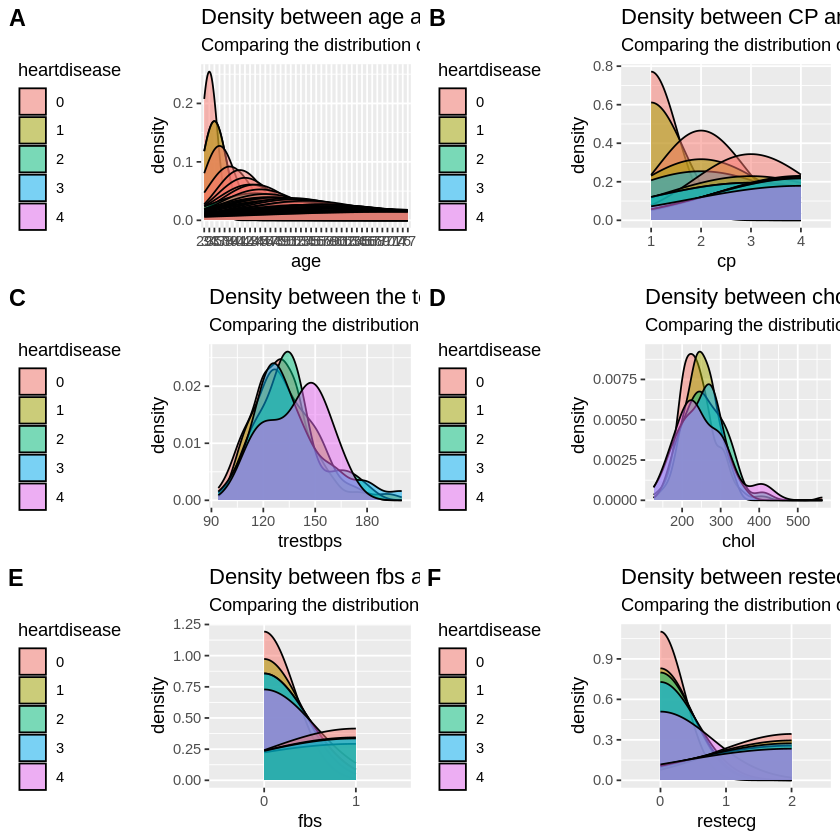

In [ ]:
completedData$heartdisease <- as.factor(completedData$heartdisease)
A <- ggplot(completedData, aes(x = age, fill = heartdisease)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between age and heartdisease",
       subtitle = "Comparing the distribution of the data")


B <- ggplot(completedData, aes(x = cp, fill = heartdisease)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between CP and heartdisease",
       subtitle = "Comparing the distribution of the data")


C <- ggplot(completedData, aes(x = trestbps, fill = heartdisease)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between the test bps results and heartdisease",
       subtitle = "Comparing the distribution of the data")



D <- ggplot(completedData, aes(x = chol, fill = heartdisease)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between chol levels and heartdisease",
       subtitle = "Comparing the distribution of the data")



E <- ggplot(completedData, aes(x = fbs, fill = heartdisease)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between fbs and heartdisease",
       subtitle = "Comparing the distribution of the data")



F_P <- ggplot(completedData, aes(x = restecg, fill = heartdisease)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between restecg and heartdisease",
       subtitle = "Comparing the distribution of the data")

ggdensity_figure_1 <- ggarrange(A, B, C, D, E, F_P,
                     labels = c("A", "B", "C", "D", "E", "F"),                     
                     ncol = 2, nrow = 3)
ggdensity_figure_1

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


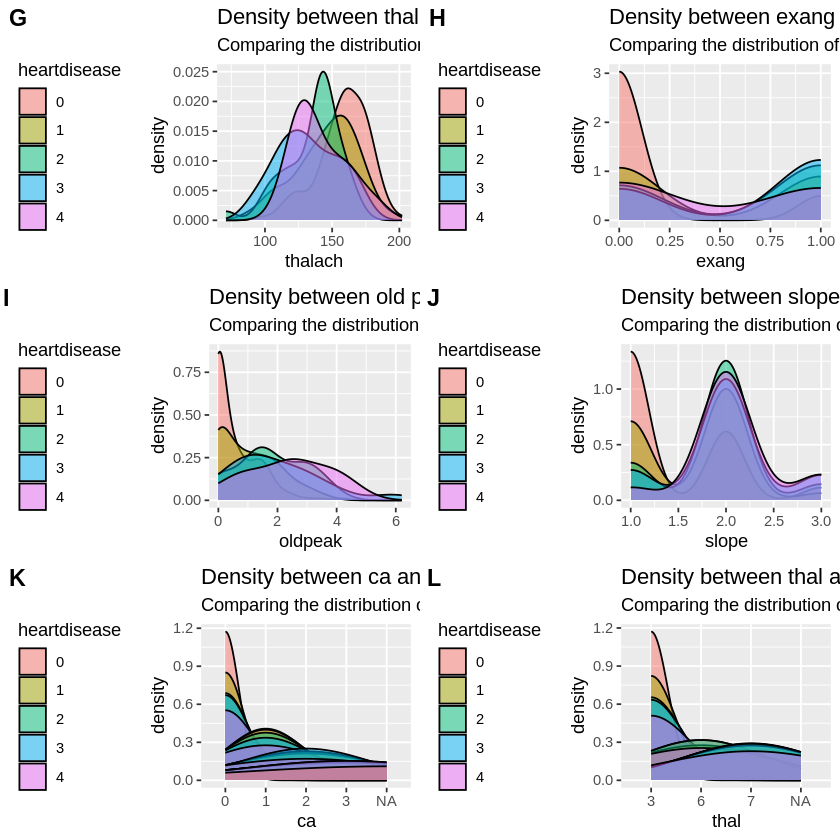

In [ ]:
completedData$heartdisease <- as.factor(completedData$heartdisease)

G <- ggplot(completedData, aes(x = thalach, fill = heartdisease)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between thalach and heartdisease",
       subtitle = "Comparing the distribution of the data")


H <- ggplot(completedData, aes(x = exang, fill = heartdisease)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between exang levels and heartdisease",
       subtitle = "Comparing the distribution of the data")



I <- ggplot(completedData, aes(x = oldpeak, fill = heartdisease)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between old peak and heartdisease",
       subtitle = "Comparing the distribution of the data")


J<- ggplot(completedData, aes(x = slope, fill = heartdisease)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between slope and heartdisease",
       subtitle = "Comparing the distribution of the data")


K<- ggplot(completedData, aes(x = ca, fill = heartdisease)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between ca and heartdisease",
       subtitle = "Comparing the distribution of the data")



L<- ggplot(completedData, aes(x = thal, fill = heartdisease)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between thal and heartdisease",
       subtitle = "Comparing the distribution of the data")

ggdensity_figure_2 <- ggarrange(G, H, I, J, K, L, 
                    labels = c("G", "H", "I", "J", "K", "L"),
                    ncol = 2, nrow = 3)
ggdensity_figure_2

1.2 Following we will perform a density plot between the numerical data and the sex as categorical variable:


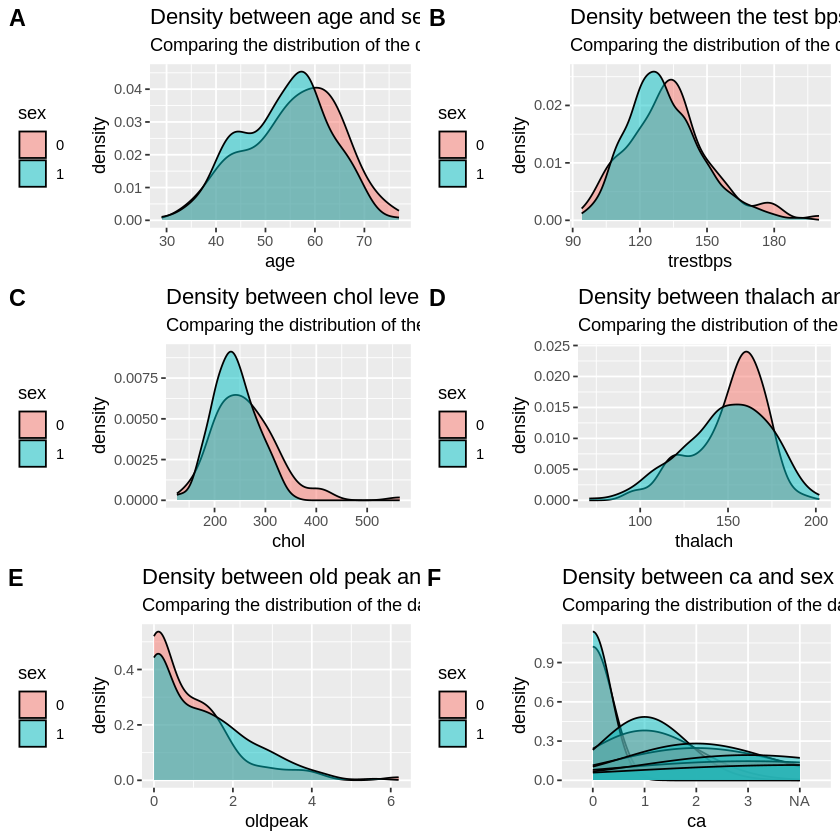

In [ ]:
# Following we will perform a density plot between the numerical data and the sex as categorical variable:
completedData$sex <- as.factor(completedData$sex)

A <- ggplot(completedData, aes(x = age, fill = sex)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between age and sex",
       subtitle = "Comparing the distribution of the data")

B <- ggplot(completedData, aes(x = trestbps, fill = sex)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between the trestbps results and sex",
       subtitle = "Comparing the distribution of the data")


C <- ggplot(completedData, aes(x = chol, fill = sex)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between chol levels and sex",
       subtitle = "Comparing the distribution of the data")


D <- ggplot(completedData, aes(x = thalach, fill = sex)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between thalach and sex",
       subtitle = "Comparing the distribution of the data")

E <- ggplot(completedData, aes(x = oldpeak, fill = sex)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between oldpeak and sex",
       subtitle = "Comparing the distribution of the data")


F_DENS <- ggplot(completedData, aes(x = ca, fill = sex)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between ca and sex",
       subtitle = "Comparing the distribution of the data")

ggdensity_figure_3 <- ggarrange(A, B, C, D, E, F_DENS,
                     labels = c("A", "B", "C", "D", "E", "F"),                     
                     ncol = 2, nrow = 3)
ggdensity_figure_3

1.3 Following we will perform a density plot between the numerical data and the chest pain as categorical variable:


Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


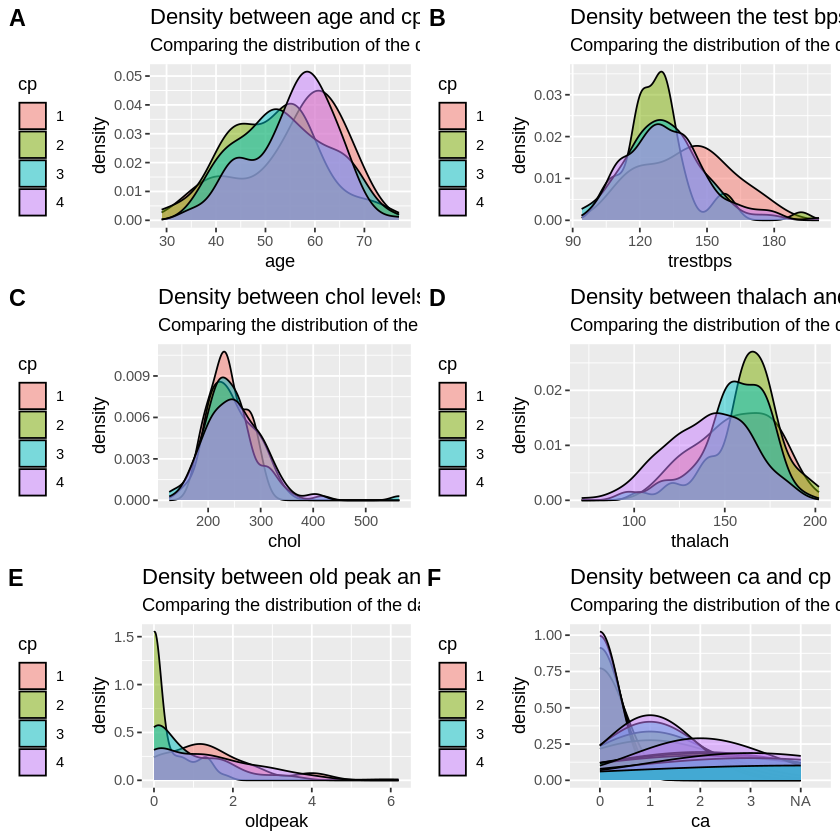

In [ ]:
# Following we will perform a density plot between the numerical data and the cp as categorical variable:
completedData$cp <- as.factor(completedData$cp)

A <- ggplot(completedData, aes(x = age, fill = cp)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between age and cp",
       subtitle = "Comparing the distribution of the data")

B <- ggplot(completedData, aes(x = trestbps, fill = cp)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between the trestbps results and cp",
       subtitle = "Comparing the distribution of the data")

C.2 <- ggplot(completedData, aes(x = chol, fill = cp)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between chol levels and cp",
       subtitle = "Comparing the distribution of the data")


D <- ggplot(completedData, aes(x = thalach, fill = cp)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between thalach and cp",
       subtitle = "Comparing the distribution of the data")


E <- ggplot(completedData, aes(x = oldpeak, fill = cp)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between oldpeak and cp",
       subtitle = "Comparing the distribution of the data")


F_DENS <- ggplot(completedData, aes(x = ca, fill = cp)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between ca and cp",
       subtitle = "Comparing the distribution of the data")


ggdensity_figure_4 <- ggarrange(A, B, C.2, D, E, F_DENS,
                     labels = c("A", "B", "C", "D", "E", "F"),                     
                     ncol = 2, nrow = 3)
ggdensity_figure_4

1.4 Following we will perform a density plot between the numerical data and the fasting blood sugar higher than 120 mg/dl as categorical variable:

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


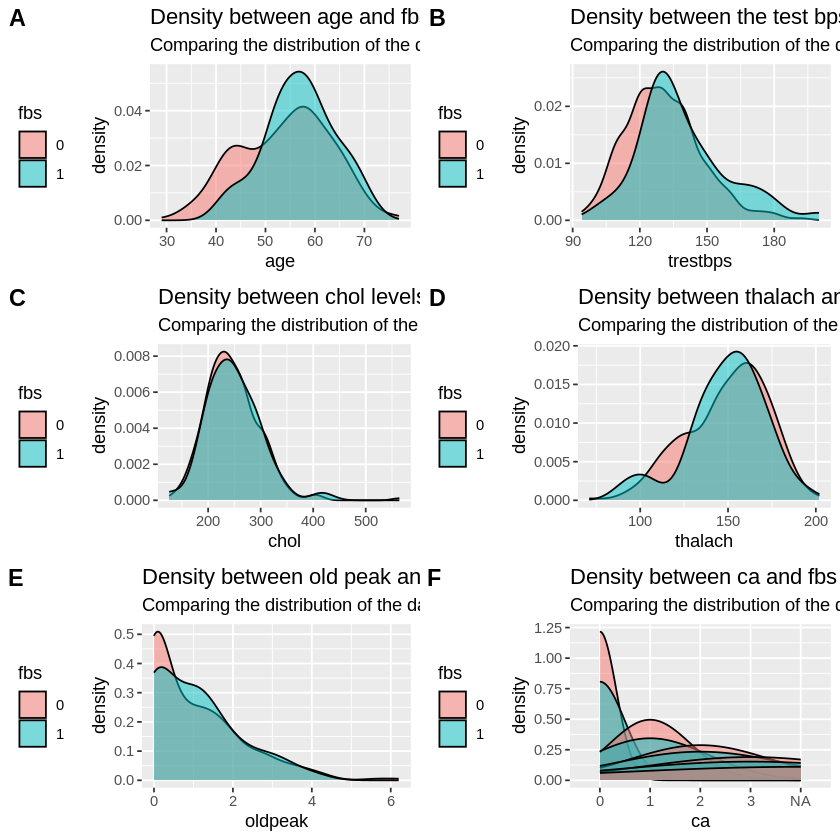

In [ ]:
# Following we will perform a density plot between the numerical data and the fbs as categorical variable:
completedData$fbs <- as.factor(completedData$fbs)

A <- ggplot(completedData, aes(x = age, fill = fbs)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between age and fbs",
       subtitle = "Comparing the distribution of the data")


B <- ggplot(completedData, aes(x = trestbps, fill = fbs)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between the trestbps results and fbs",
       subtitle = "Comparing the distribution of the data")



C <- ggplot(completedData, aes(x = chol, fill = fbs)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between chol levels and fbs",
       subtitle = "Comparing the distribution of the data")

D <- ggplot(completedData, aes(x = thalach, fill = fbs)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between thalach and fbs",
       subtitle = "Comparing the distribution of the data")

E <- ggplot(completedData, aes(x = oldpeak, fill = fbs)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between oldpeak and fbs",
       subtitle = "Comparing the distribution of the data")


F_P <- ggplot(completedData, aes(x = ca, fill = fbs)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between ca and fbs",
       subtitle = "Comparing the distribution of the data")



ggdensity_figure_5 <- ggarrange(A, B, C, D, E, F_P,
                     labels = c("A", "B", "C", "D", "E", "F"),                     
                     ncol = 2, nrow = 3)
ggdensity_figure_5

1.5 Following we will perform a density plot between the numerical data and the resting electrocardiographic results as numerical variable:

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


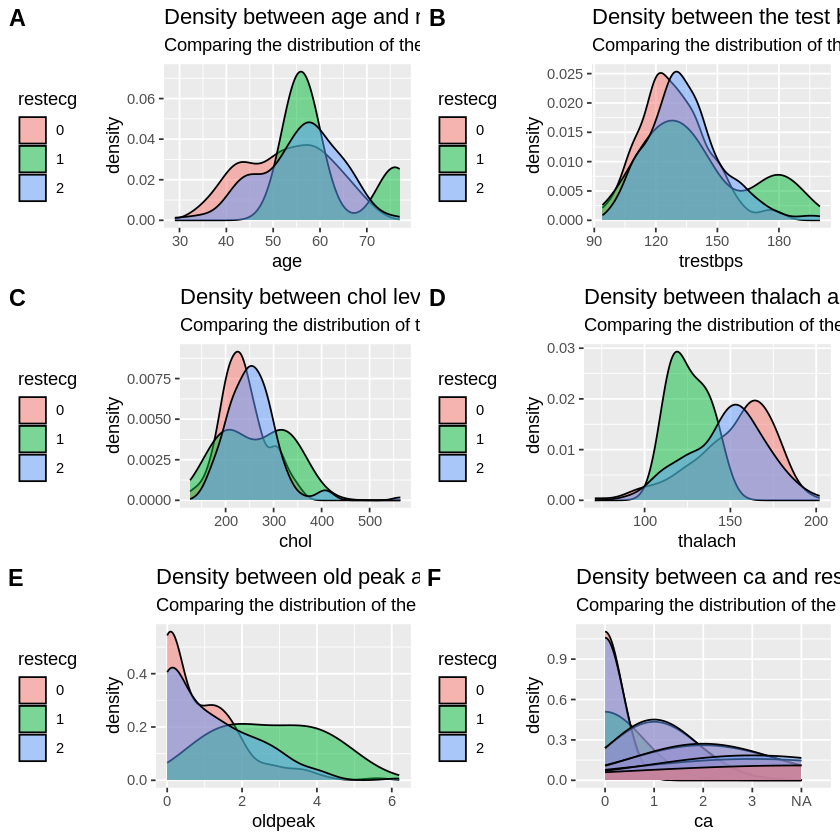

In [ ]:
# Following we will perform a density plot between the numerical data and the restecg as numerical variable:
completedData$restecg <- as.factor(completedData$restecg)

A <- ggplot(completedData, aes(x = age, fill = restecg)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between age and restecg",
       subtitle = "Comparing the distribution of the data")


B <- ggplot(completedData, aes(x = trestbps, fill = restecg)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between the trestbps results and restecg",
       subtitle = "Comparing the distribution of the data")



C <- ggplot(completedData, aes(x = chol, fill = restecg)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between chol levels and restecg",
       subtitle = "Comparing the distribution of the data")


D <- ggplot(completedData, aes(x = thalach, fill = restecg)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between thalach and restecg",
       subtitle = "Comparing the distribution of the data")


E <- ggplot(completedData, aes(x = oldpeak, fill = restecg)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between oldpeak and restecg",
       subtitle = "Comparing the distribution of the data")


F_P <- ggplot(completedData, aes(x = ca, fill = restecg)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between ca and restecg",
       subtitle = "Comparing the distribution of the data")



ggdensity_figure_6 <- ggarrange(A, B, C, D, E, F_P,
                     labels = c("A", "B", "C", "D", "E", "F"),                     
                     ncol = 2, nrow = 3)
ggdensity_figure_6


1.6 Following we will perform a density plot between the numerical data and the exercise induced angina as categorical variable:

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


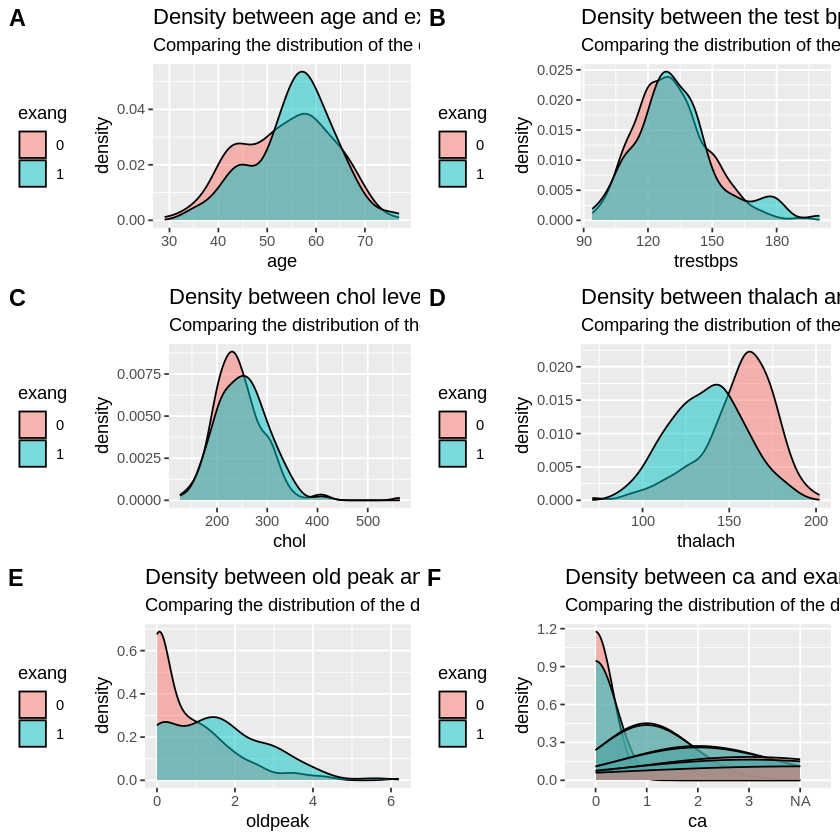

In [ ]:
# Following we will perform a density plot between the numerical data and the exang as categorical variable:
completedData$exang <- as.factor(completedData$exang)

A <- ggplot(completedData, aes(x = age, fill = exang)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between age and exang",
       subtitle = "Comparing the distribution of the data")

B <- ggplot(completedData, aes(x = trestbps, fill = exang)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between the trestbps results and exang",
       subtitle = "Comparing the distribution of the data")



C <- ggplot(completedData, aes(x = chol, fill = exang)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between chol levels and exang",
       subtitle = "Comparing the distribution of the data")


D <- ggplot(completedData, aes(x = thalach, fill = exang)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between thalach and exang",
       subtitle = "Comparing the distribution of the data")

E <- ggplot(completedData, aes(x = oldpeak, fill = exang)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between oldpeak and exang",
       subtitle = "Comparing the distribution of the data")

F_P <- ggplot(completedData, aes(x = ca, fill = exang)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between ca and exang",
       subtitle = "Comparing the distribution of the data")



ggdensity_figure_7 <- ggarrange(A, B, C, D, E, F_P,
                     labels = c("A", "B", "C", "D", "E", "F"),                     
                     ncol = 2, nrow = 3)
ggdensity_figure_7

1.7 Following we will perform a density plot between the numerical data and the slope of the peak exercise ST segment as categorical variable:

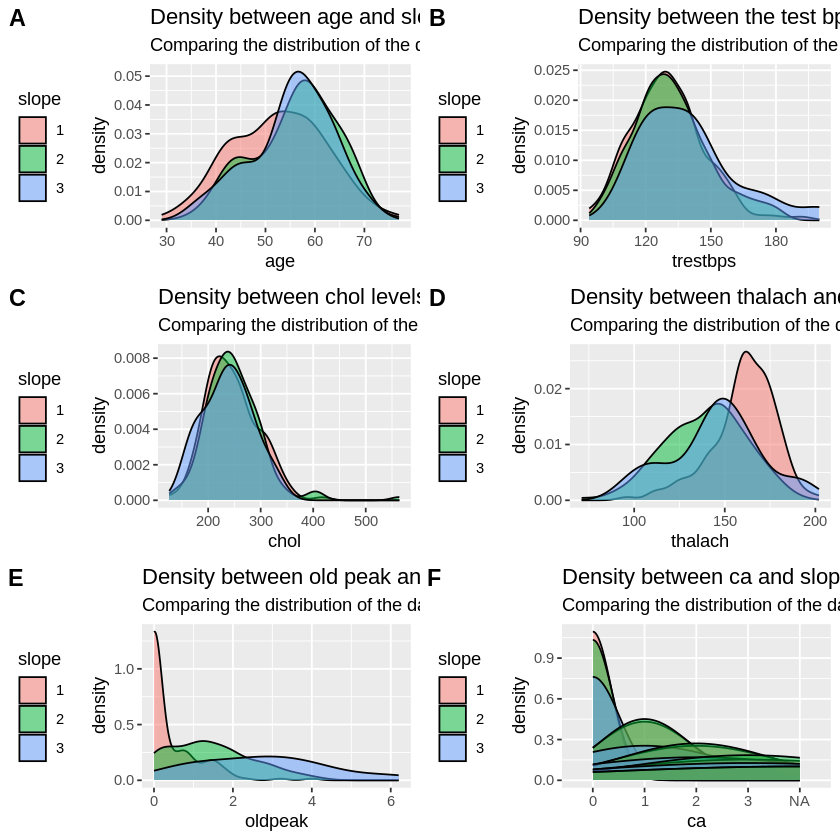

In [ ]:
# Following we will perform a density plot between the numerical data and the slope as categorical variable:
completedData$slope <- as.factor(completedData$slope)

A <- ggplot(completedData, aes(x = age, fill = slope)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between age and slope",
       subtitle = "Comparing the distribution of the data")

B <- ggplot(completedData, aes(x = trestbps, fill = slope)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between the trestbps and slope",
       subtitle = "Comparing the distribution of the data")


C <- ggplot(completedData, aes(x = chol, fill = slope)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between chol levels and slope",
       subtitle = "Comparing the distribution of the data")


D <- ggplot(completedData, aes(x = thalach, fill = slope)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between thalach and slope",
       subtitle = "Comparing the distribution of the data")


E <- ggplot(completedData, aes(x = oldpeak, fill = slope)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between oldpeak and slope",
       subtitle = "Comparing the distribution of the data")


F_P <- ggplot(completedData, aes(x = ca, fill = slope)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between ca and slope",
       subtitle = "Comparing the distribution of the data")


ggdensity_figure_8 <- ggarrange(A, B, C, D, E, F_P,
                      labels = c("A", "B", "C", "D", "E", "F"),                     
                      ncol = 2, nrow = 3)
ggdensity_figure_8

1.8 Following we will perform a density plot between the numerical data and the thalassemia types as the categorical variable:

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”

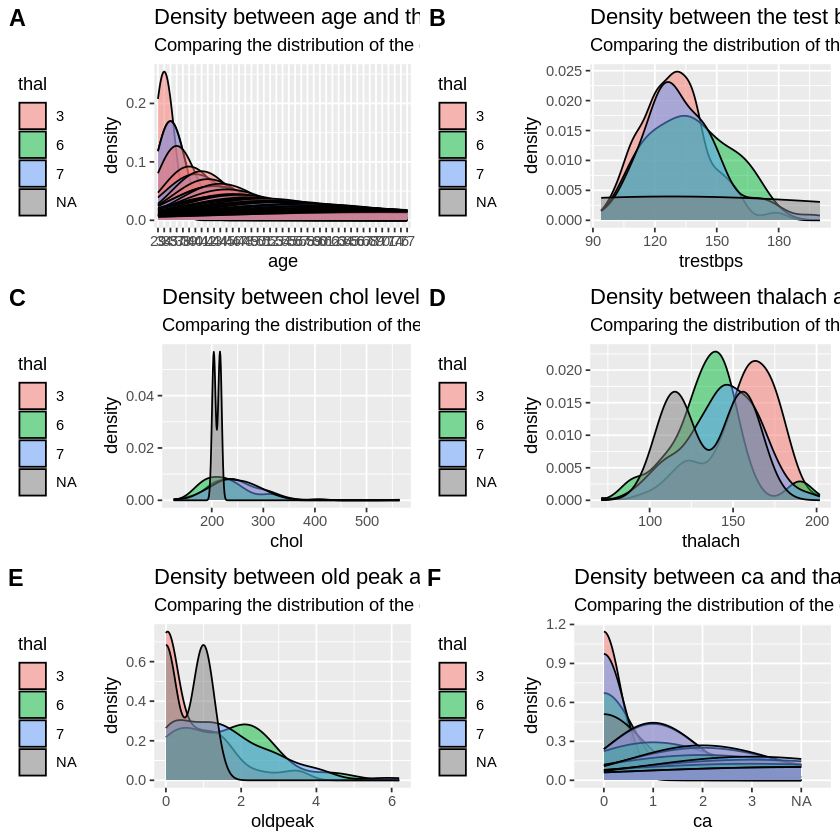

In [ ]:
# Following we will perform a density plot between the numerical data and the thal as the categorical variable:
completedData$thal <- as.factor(completedData$thal)

A <- ggplot(completedData, aes(x = age, fill = thal)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between age and thal",
       subtitle = "Comparing the distribution of the data")



B <- ggplot(completedData, aes(x = trestbps, fill = thal)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between the trestbps and thal",
       subtitle = "Comparing the distribution of the data")



C <- ggplot(completedData, aes(x = chol, fill = thal)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between chol levels and thal",
       subtitle = "Comparing the distribution of the data")

D <- ggplot(completedData, aes(x = thalach, fill = thal)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between thalach and thal",
       subtitle = "Comparing the distribution of the data")

E <- ggplot(completedData, aes(x = oldpeak, fill = thal)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between oldpeak and thal",
       subtitle = "Comparing the distribution of the data")


F_P <- ggplot(completedData, aes(x = ca, fill = thal)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between ca and thal",
       subtitle = "Comparing the distribution of the data")



ggdensity_figure_9 <- ggarrange(A, B, C, D, E, F_P,
                      labels = c("A", "B", "C", "D", "E", "F"),                     
                      ncol = 2, nrow = 3)
ggdensity_figure_9


1.9 Following we will perform a density plot between the numerical data and the sex as also numerical data:


Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


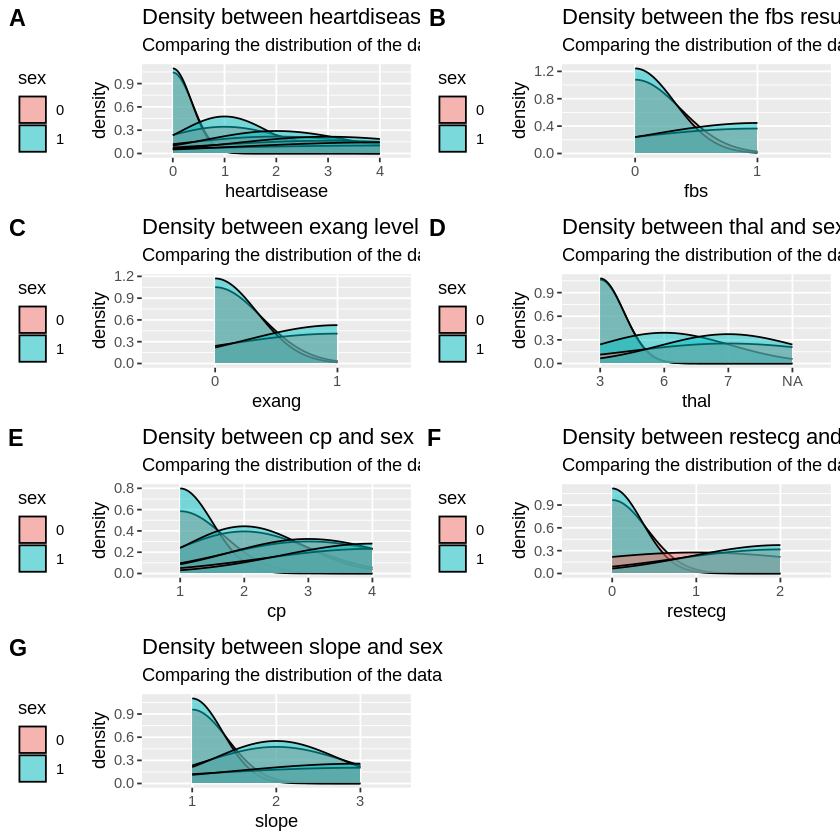

In [ ]:
# Following we will perform a density plot between the numerical data and the sex as also numerical data:
completedData$sex <- as.factor(completedData$sex)

A.2 <- ggplot(completedData, aes(x = heartdisease, fill = sex)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between heartdisease and sex",
       subtitle = "Comparing the distribution of the data")

B.2 <- ggplot(completedData, aes(x = fbs, fill = sex)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between the fbs results and sex",
       subtitle = "Comparing the distribution of the data")


C.2 <- ggplot(completedData, aes(x = exang, fill = sex)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between exang levels and sex",
       subtitle = "Comparing the distribution of the data")


D.2 <- ggplot(completedData, aes(x = thal, fill = sex)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between thal and sex",
       subtitle = "Comparing the distribution of the data")

E.2 <- ggplot(completedData, aes(x = cp, fill = sex)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between cp and sex",
       subtitle = "Comparing the distribution of the data")


F_DENS <- ggplot(completedData, aes(x = restecg, fill = sex)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between restecg and sex",
       subtitle = "Comparing the distribution of the data")

G.2 <- ggplot(completedData, aes(x = slope, fill = sex)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between slope and sex",
       subtitle = "Comparing the distribution of the data")

ggdensity_figure_3.2 <- ggarrange(A.2, B.2, C.2, D.2, E.2, F_DENS, G.2,
                                labels = c("A", "B", "C", "D", "E", "F", "G"),                     
                                ncol = 2, nrow = 4)
ggdensity_figure_3.2

1.10 Following we will perform a density plot between the numerical data and the thal as thal as also numerical data:


Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been droppe

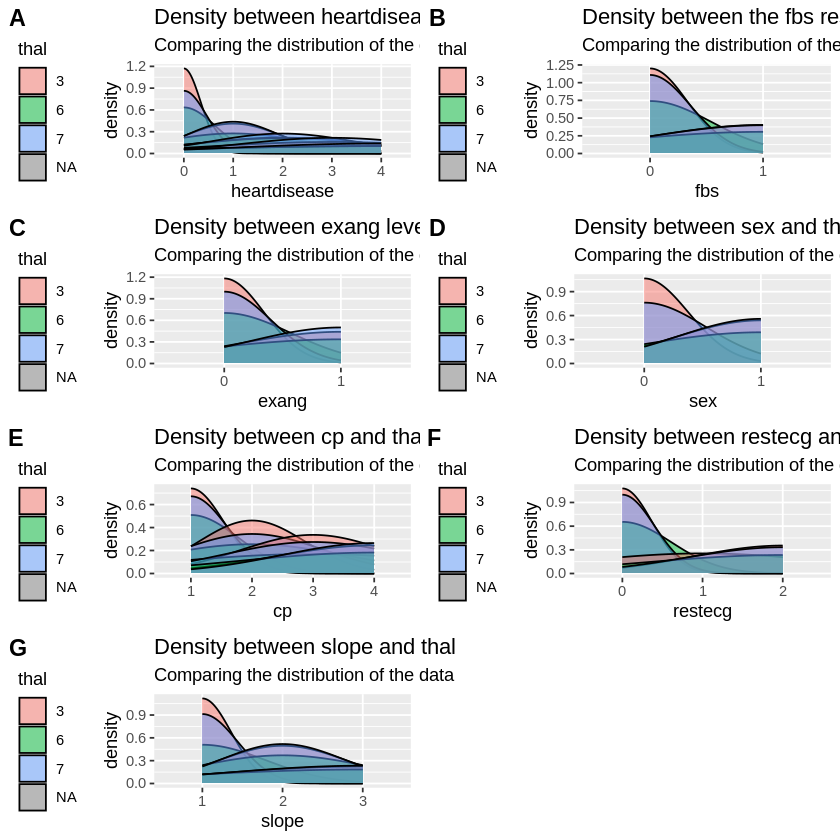

In [ ]:
# Following we will perform a density plot between the numerical data and the thal as also numerical data:
completedData$thal <- as.factor(completedData$thal)

A <- ggplot(completedData, aes(x = heartdisease, fill = thal)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between heartdisease and thal",
       subtitle = "Comparing the distribution of the data")

B <- ggplot(completedData, aes(x = fbs, fill = thal)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between the fbs results and thal",
       subtitle = "Comparing the distribution of the data")


C <- ggplot(completedData, aes(x = exang, fill = thal)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between exang levels and thal",
       subtitle = "Comparing the distribution of the data")


D <- ggplot(completedData, aes(x = sex, fill = thal)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between sex and thal",
       subtitle = "Comparing the distribution of the data")

E <- ggplot(completedData, aes(x = cp, fill = thal)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between cp and thal",
       subtitle = "Comparing the distribution of the data")


F_DENS <- ggplot(completedData, aes(x = restecg, fill = thal)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between restecg and thal",
       subtitle = "Comparing the distribution of the data")

G <- ggplot(completedData, aes(x = slope, fill = thal)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between slope and thal",
       subtitle = "Comparing the distribution of the data")

ggdensity_figure_4.2 <- ggarrange(A, B, C, D, E, F_DENS, G,
                                  labels = c("A", "B", "C", "D", "E", "F", "G"),                     
                                  ncol = 2, nrow = 4)
ggdensity_figure_4.2

1.11 Following we will perform a density plot between the numerical data and the slope as also numerical variable:


Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


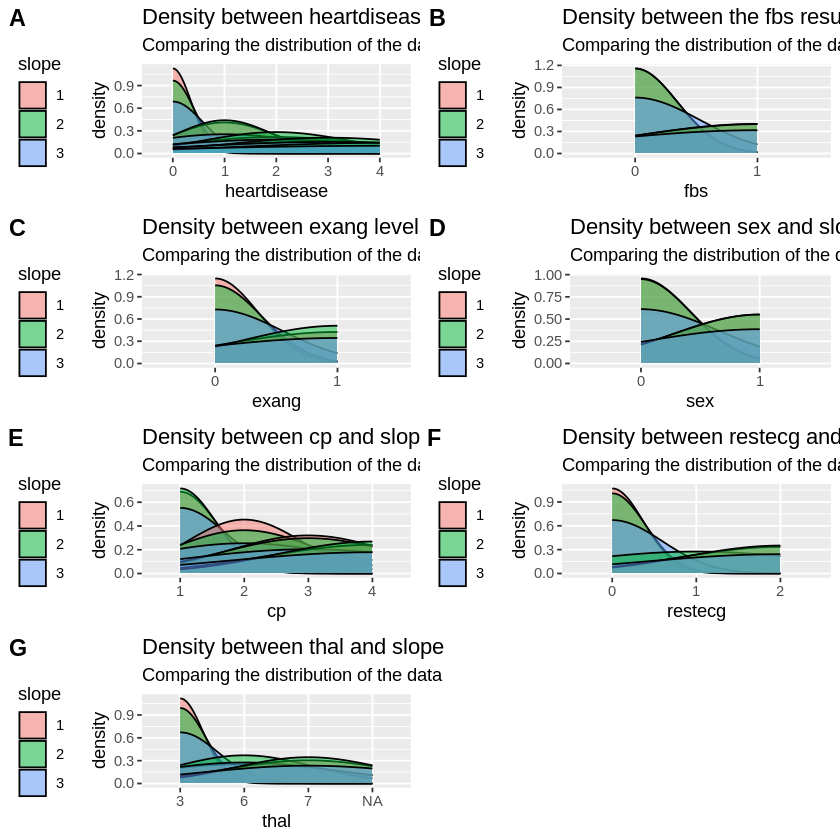

In [ ]:
# Following we will perform a density plot between the numerical data and the slope as also numerical variable:
completedData$slope <- as.factor(completedData$slope)

A <- ggplot(completedData, aes(x = heartdisease, fill = slope)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between heartdisease and slope",
       subtitle = "Comparing the distribution of the data")

B <- ggplot(completedData, aes(x = fbs, fill = slope)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between the fbs results and slope",
       subtitle = "Comparing the distribution of the data")


C <- ggplot(completedData, aes(x = exang, fill = slope)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between exang levels and slope",
       subtitle = "Comparing the distribution of the data")


D <- ggplot(completedData, aes(x = sex, fill = slope)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between sex and slope",
       subtitle = "Comparing the distribution of the data")

E <- ggplot(completedData, aes(x = cp, fill = slope)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between cp and slope",
       subtitle = "Comparing the distribution of the data")


F_DENS <- ggplot(completedData, aes(x = restecg, fill = slope)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between restecg and slope",
       subtitle = "Comparing the distribution of the data")

G <- ggplot(completedData, aes(x = thal, fill = slope)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between thal and slope",
       subtitle = "Comparing the distribution of the data")

ggdensity_figure_5.2 <- ggarrange(A, B, C, D, E, F_DENS, G,
                                  labels = c("A", "B", "C", "D", "E", "F", "G"),                     
                                  ncol = 2, nrow = 4)
ggdensity_figure_5.2

1.12 Following we will perform a density plot between the numerical data and the exang as also numerical variable:


Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


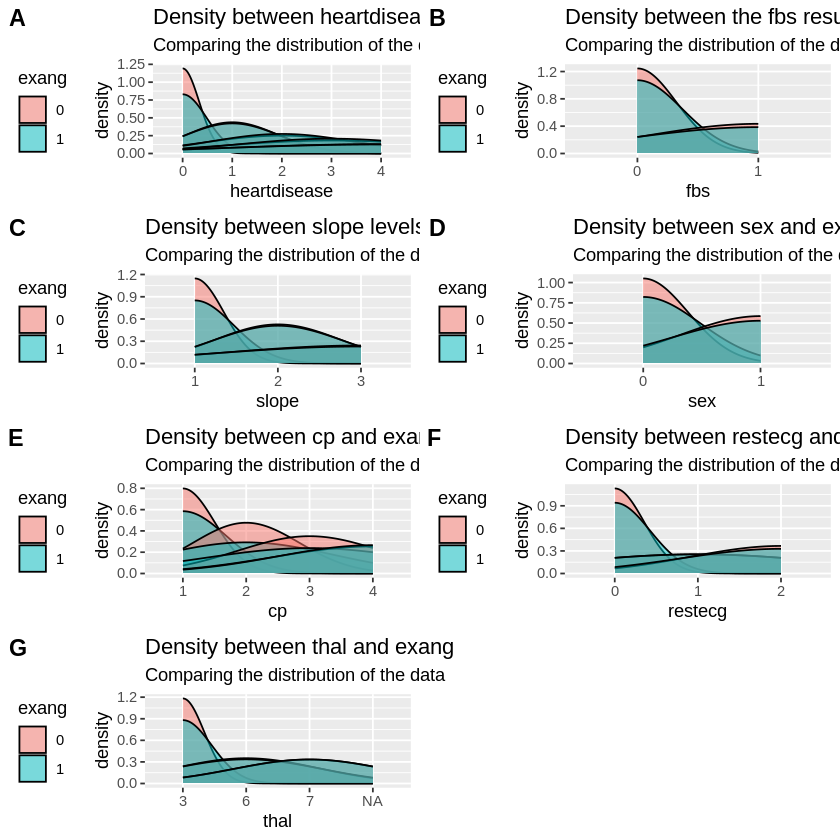

In [ ]:
# Following we will perform a density plot between the numerical data and the exang as also numerical variable:
A <- ggplot(completedData, aes(x = heartdisease, fill = exang)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between heartdisease and exang",
       subtitle = "Comparing the distribution of the data")

B <- ggplot(completedData, aes(x = fbs, fill = exang)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between the fbs results and exang",
       subtitle = "Comparing the distribution of the data")


C <- ggplot(completedData, aes(x = slope, fill = exang)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between slope levels and exang",
       subtitle = "Comparing the distribution of the data")


D <- ggplot(completedData, aes(x = sex, fill = exang)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between sex and exang",
       subtitle = "Comparing the distribution of the data")

E <- ggplot(completedData, aes(x = cp, fill = exang)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between cp and exang",
       subtitle = "Comparing the distribution of the data")


F_DENS <- ggplot(completedData, aes(x = restecg, fill = exang)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between restecg and exang",
       subtitle = "Comparing the distribution of the data")

G <- ggplot(completedData, aes(x = thal, fill = exang)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between thal and exang",
       subtitle = "Comparing the distribution of the data")

ggdensity_figure_6.2 <- ggarrange(A, B, C, D, E, F_DENS, G,
                                  labels = c("A", "B", "C", "D", "E", "F", "G"),                     
                                  ncol = 2, nrow = 4)
ggdensity_figure_6.2

1.13 Following we will perform a density plot between the numerical data and the restecg also the numerical variable:

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to m

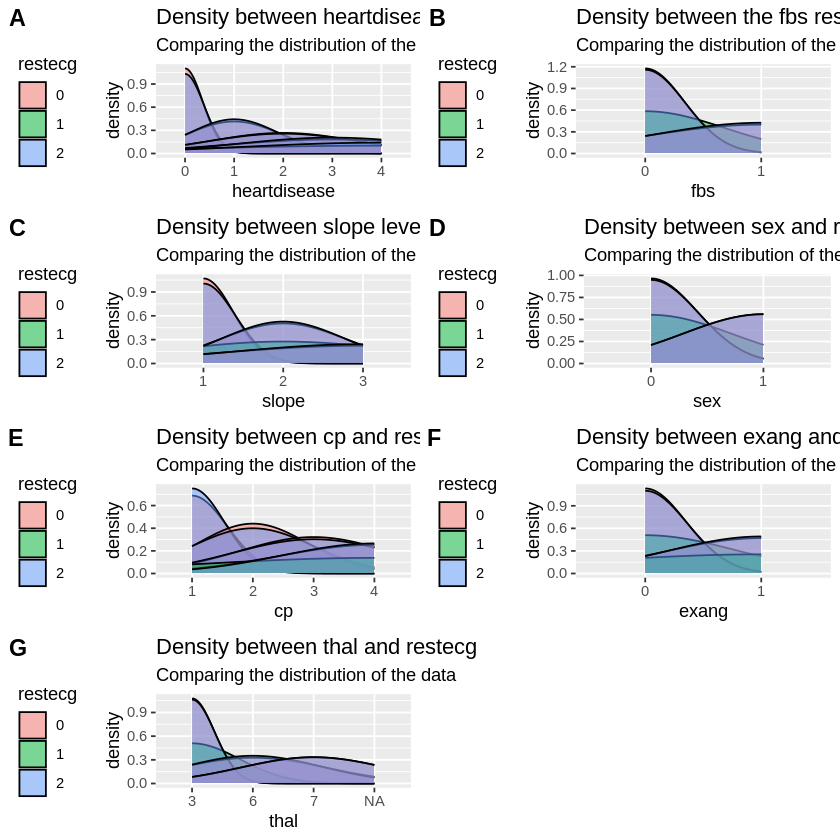

In [ ]:
# Following we will perform a density plot between the numerical data and the retecg as the numeircal variable:
A <- ggplot(completedData, aes(x = heartdisease, fill = restecg)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between heartdisease and restecg",
       subtitle = "Comparing the distribution of the data")

B <- ggplot(completedData, aes(x = fbs, fill = restecg)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between the fbs results and restecg",
       subtitle = "Comparing the distribution of the data")


C <- ggplot(completedData, aes(x = slope, fill = restecg)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between slope levels and restecg",
       subtitle = "Comparing the distribution of the data")


D <- ggplot(completedData, aes(x = sex, fill = restecg)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between sex and restecg",
       subtitle = "Comparing the distribution of the data")

E <- ggplot(completedData, aes(x = cp, fill = restecg)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between cp and restecg",
       subtitle = "Comparing the distribution of the data")


F_DENS <- ggplot(completedData, aes(x = exang, fill = restecg)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between exang and restecg",
       subtitle = "Comparing the distribution of the data")

G <- ggplot(completedData, aes(x = thal, fill = restecg)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between thal and restecg",
       subtitle = "Comparing the distribution of the data")

ggdensity_figure_7.2 <- ggarrange(A, B, C, D, E, F_DENS, G,
                                  labels = c("A", "B", "C", "D", "E", "F", "G"),                     
                                  ncol = 2, nrow = 4)
ggdensity_figure_7.2

1.14 Following we will perform a density plot between the numerical data and the cp also the numerical variable:


Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been droppe

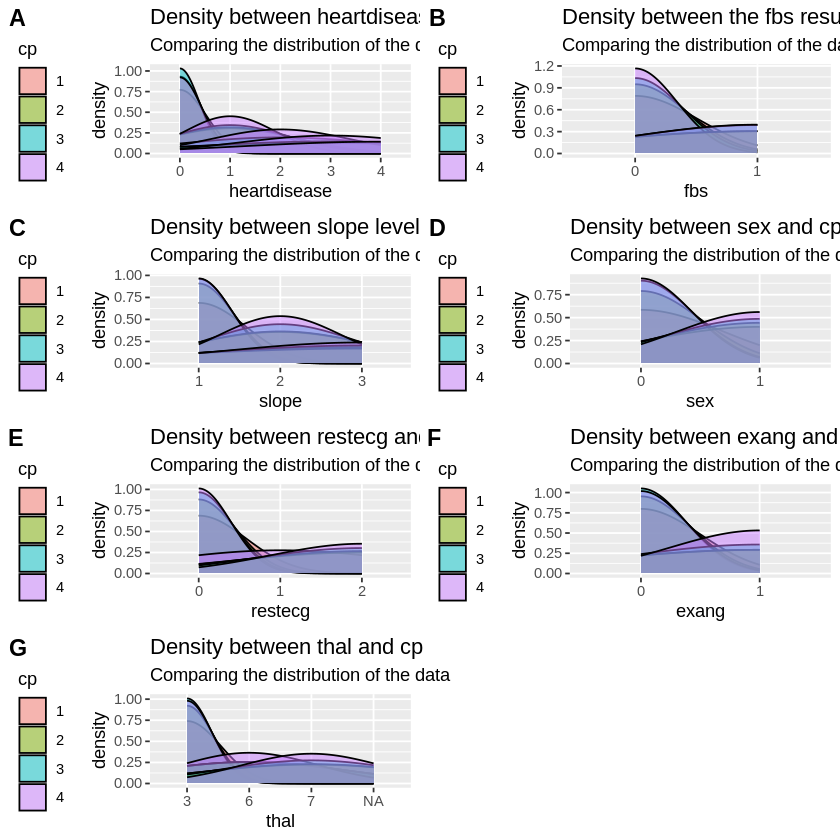

In [ ]:
# Following we will perform a density plot between the numerical data and the cp also the numerical variable:
A <- ggplot(completedData, aes(x = heartdisease, fill = cp)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between heartdisease and cp",
       subtitle = "Comparing the distribution of the data")

B <- ggplot(completedData, aes(x = fbs, fill = cp)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between the fbs results and cp",
       subtitle = "Comparing the distribution of the data")


C <- ggplot(completedData, aes(x = slope, fill = cp)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between slope levels and cp",
       subtitle = "Comparing the distribution of the data")


D <- ggplot(completedData, aes(x = sex, fill = cp)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between sex and cp",
       subtitle = "Comparing the distribution of the data")

E <- ggplot(completedData, aes(x = restecg, fill = cp)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between restecg and cp",
       subtitle = "Comparing the distribution of the data")


F_DENS <- ggplot(completedData, aes(x = exang, fill = cp)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between exang and cp",
       subtitle = "Comparing the distribution of the data")

G <- ggplot(completedData, aes(x = thal, fill = cp)) +
  geom_density(alpha = 0.5) +
  theme(legend.position = "left")+
  labs(title = "Density between thal and cp",
       subtitle = "Comparing the distribution of the data")

ggdensity_figure_8.2 <- ggarrange(A, B, C, D, E, F_DENS, G,
                                  labels = c("A", "B", "C", "D", "E", "F", "G"),                     
                                  ncol = 2, nrow = 4)
ggdensity_figure_8.2

**CONCLUSIONS FROM THE DENSITY PLOTS**

We'll start by examining the location of the data variables in order to  get a preliminary idea of which factors will be more important than other variables based on the differences in these distributions.

The maximum heart rate reached, the ST depression induced by exercise relative to rest and the number of major vessles colored by fluoroscopy are the variables that are more differentially distributed when compared with the existence or absence of a cardiac condition. Additionally, we can observe that differing ages and the severity of chest pain are additional potential important factors when determining whether or not a person is more or less vulnerable to having a cardiac condition.

When examining the distribution of numerical data that has been divided into the two sexes, we can see that the maximum rate archived and the serum cholesterol in mg/dl appear to have the most varied distributions.

Interestingly, in the previous plots we can see some differences when classifying the variables with the type of chest pain and the resting electrocardiographic results, since they are categorical data with different levels, we can not really conclude anything. Therefore, in order to show how they might be related, we need more plots (like box plots). 

The variable that appears to be more differently distributed throughout the various groups defined when examining the data distribution when classifying the variables in the fasting blood sugar more than 120 mg/dl is the number of major vessels coloured by fluoroscopy.

The maximum heart rate reached, the ST depression induced by exercise relative to rest, the number of major vessels coloured by fluoroscopy, and the age are the numerical variables that present a more distinct distribution of the data among the different groups, as can be seen once we have classified the numerical data according to the exercise induced angina. Therefore, it seems that these are the variables which, based on these graphs, are most likely to have an impact on exercise-induced angina.

Age, the ST depression caused by exercise relative to rest, the maximum heart rate achieved, and the number of major vessels coloured by fluoroscopy are the ones that demonstrate a more distinct distribution of the data among the different thalassemia groups.

The maximum rate achieved, the number of major vessels coloured by fluoroscopy, and the ST depression induced by exercise relative to rest are the numerical variables that seem to be more influenced by  the slope of the peak exercise ST segment .

However, since with these density plots we do not have enough information in order to come up with a robust conclusion, we are going to perform some plots.


2. BOX PLOTS

In this box plots we are going to combine categorical and numerical variables.

2.2 Box plot to see how the numerical vairables behave when dividing them by the presence or absence of a heart disease.


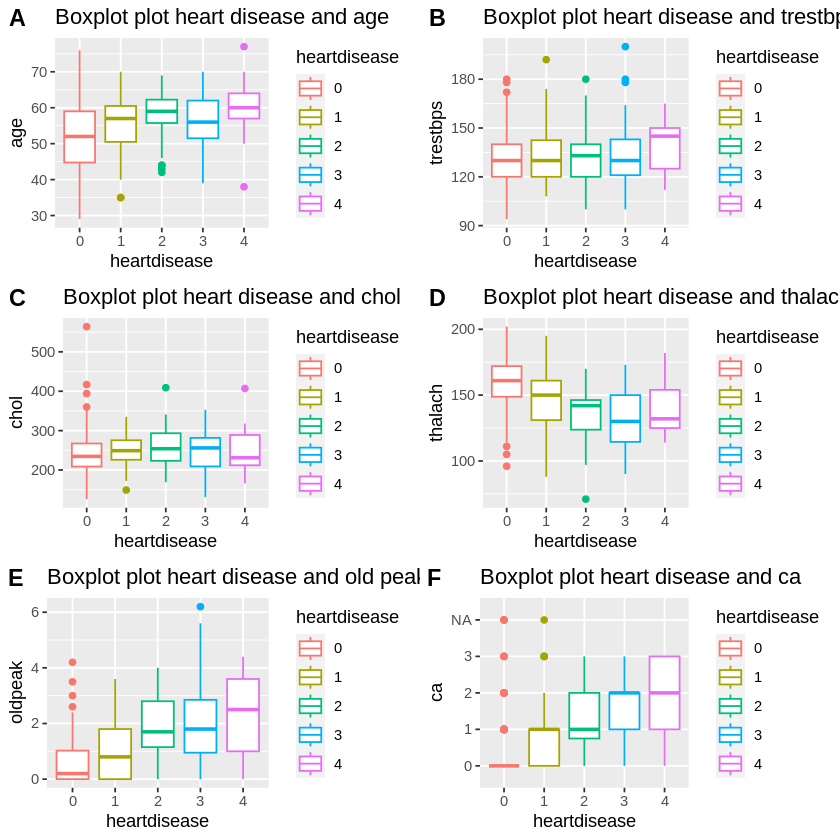

In [ ]:
A <- ggplot(completedData, aes(x=heartdisease, y=age, color = heartdisease)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot heart disease and age")


B <- ggplot(completedData, aes(x=heartdisease, y=trestbps, group = heartdisease, color = heartdisease)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot heart disease and trestbps")


C <- ggplot(completedData, aes(x=heartdisease, y=chol, group = heartdisease, color = heartdisease)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot heart disease and chol")


D <- ggplot(completedData, aes(x=heartdisease, y=thalach, group = heartdisease, color = heartdisease)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot heart disease and thalach")


E <- ggplot(completedData, aes(x=heartdisease, y=oldpeak, group = heartdisease, color = heartdisease)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot heart disease and oldpeak")


F_BOX <- ggplot(completedData, aes(x=heartdisease, y=ca, group = heartdisease, color = heartdisease)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot heart disease and ca")


ggbox_figure_1 <- ggarrange(A, B, C, D, E, F_BOX, 
                             labels = c("A", "B", "C", "D", "E", "F"),
                             ncol = 2, nrow =3)
ggbox_figure_1

2.2 Box plot to see how the numerical vairables behave when dividing them by sex.



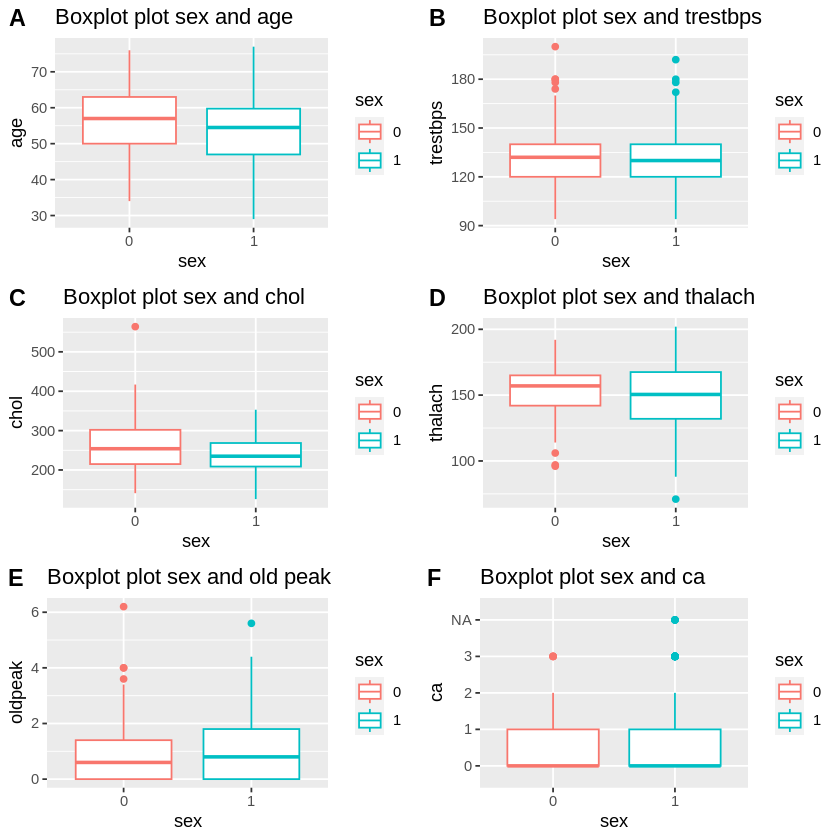

In [ ]:
# Comparing the sex with the other numerical data
A <- ggplot(completedData, aes(x=sex, y=age, group = sex, color = sex)) + 
  geom_boxplot() + 
  labs(title = "Boxplot plot sex and age")


B <- ggplot(completedData, aes(x=sex, y=trestbps, group = sex, color = sex)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot sex and trestbps")


C <- ggplot(completedData, aes(x=sex, y=chol, group = sex, color = sex)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot sex and chol")


D <- ggplot(completedData, aes(x=sex, y=thalach, group = sex, color = sex)) + 
  geom_boxplot()+
  labs(title = "Boxplot plot sex and thalach")


E <- ggplot(completedData, aes(x=sex, y=oldpeak, group = sex, color = sex)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot sex and oldpeak")


F_BOX <- ggplot(completedData, aes(x=sex, y=ca, group = sex, color = sex)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot sex and ca")


ggbox_figure_2 <- ggarrange(A, B, C, D, E, F_BOX, 
                            labels = c("A", "B", "C", "D", "E", "F"),
                            ncol = 2, nrow =3)
ggbox_figure_2


2.3 Box plot to see how the numerical vairables behave when dividing them by the type of chest pain.

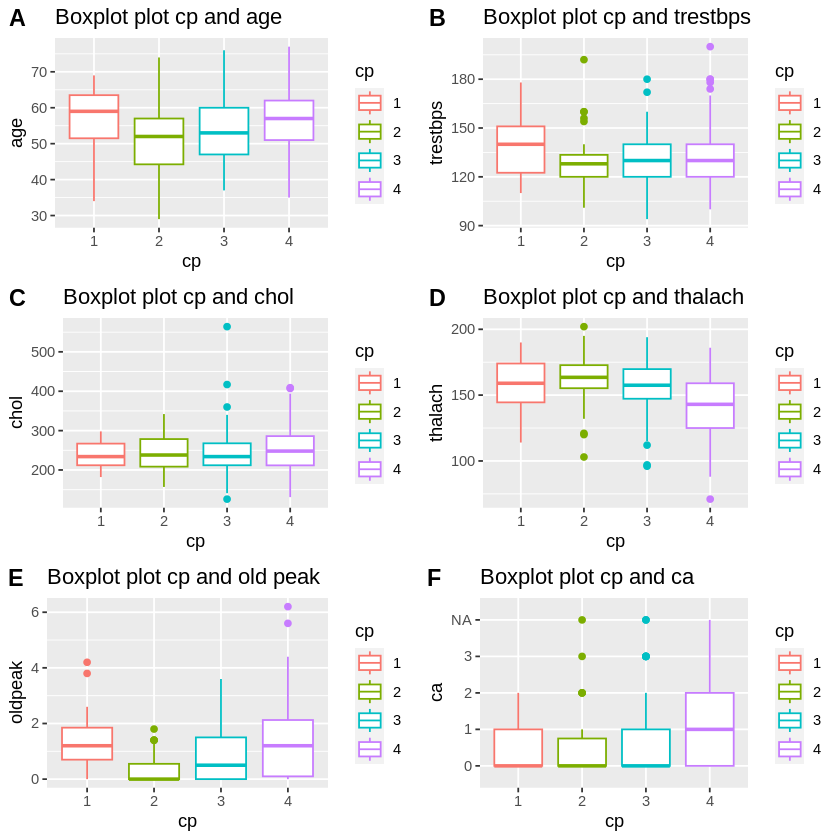

In [ ]:
# Comparing the cp with the other numerical data
A <- ggplot(completedData, aes(x=cp, y=age, group = cp, color = cp)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot cp and age")

B <- ggplot(completedData, aes(x=cp, y=trestbps, group = cp, color = cp)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot cp and trestbps")

C <- ggplot(completedData, aes(x=cp, y=chol, group = cp, color = cp)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot cp and chol")

D <- ggplot(completedData, aes(x=cp, y=thalach, group = cp, color = cp)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot cp and thalach")

E <- ggplot(completedData, aes(x=cp, y=oldpeak, group = cp, color = cp)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot cp and oldpeak")

F_BOX <- ggplot(completedData, aes(x=cp, y=ca, group = cp, color = cp)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot cp and ca")

ggbox_figure_3 <- ggarrange(A, B, C, D, E, F_BOX, 
                            labels = c("A", "B", "C", "D", "E", "F"),
                            ncol = 2, nrow =3)
ggbox_figure_3

2.4 Box plot to see how the numerical vairables behave when dividing them by the fasting blood sugar higher than 120 mg/dl.

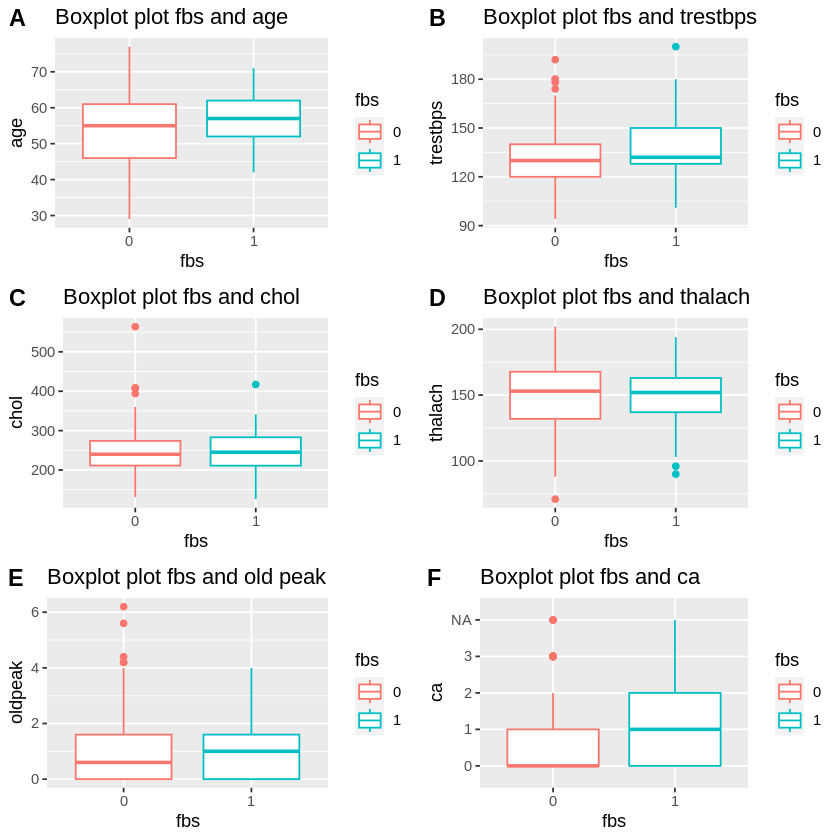

In [ ]:
# Comparing the fbs with the other numerical data
A <- ggplot(completedData, aes(x=fbs, y=age, group = fbs, color = fbs)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot fbs and age")

B <- ggplot(completedData, aes(x=fbs, y=trestbps, group = fbs, color = fbs)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot fbs and trestbps")


C <- ggplot(completedData, aes(x=fbs, y=chol, group = fbs, color = fbs)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot fbs and chol")

D <- ggplot(completedData, aes(x=fbs, y=thalach, group = fbs, color = fbs)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot fbs and thalach")


E <- ggplot(completedData, aes(x=fbs, y=oldpeak, group = fbs, color = fbs)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot fbs and oldpeak")


F_BOX <- ggplot(completedData, aes(x=fbs, y=ca, group = fbs, color = fbs)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot fbs and ca")


ggbox_figure_4 <- ggarrange(A, B, C, D, E, F_BOX, 
                            labels = c("A", "B", "C", "D", "E", "F"),
                            ncol = 2, nrow =3)
ggbox_figure_4

2.5 Box plot to see how the numerical vairables behave when dividing them by resting electrocardiographic results.

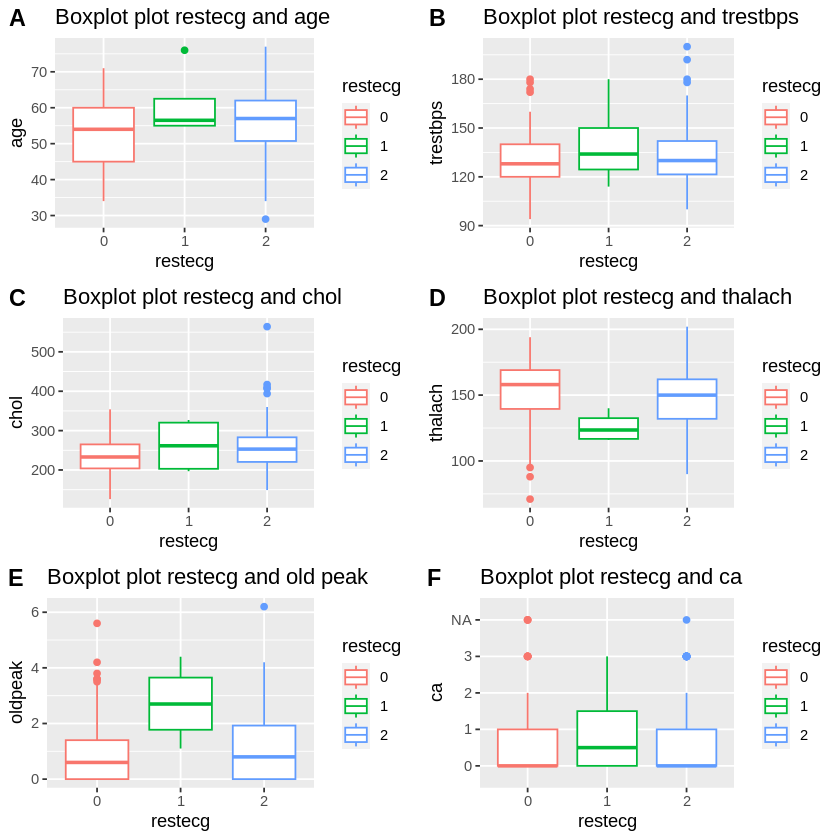

In [ ]:
# Comparing the restecg with the other numerical data
A <- ggplot(completedData, aes(x=restecg, y=age, group = restecg, color = restecg)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot restecg and age")

B <- ggplot(completedData, aes(x=restecg, y=trestbps, group = restecg, color = restecg)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot restecg and trestbps")

C <- ggplot(completedData, aes(x=restecg, y=chol, group = restecg, color = restecg)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot restecg and chol")

D <- ggplot(completedData, aes(x=restecg, y=thalach, group = restecg, color = restecg)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot restecg and thalach")

E <- ggplot(completedData, aes(x=restecg, y=oldpeak, group = restecg, color = restecg)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot restecg and oldpeak")

F_BOX <- ggplot(completedData, aes(x=restecg, y=ca, group = restecg, color = restecg)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot restecg and ca")

ggbox_figure_5 <- ggarrange(A, B, C, D, E, F_BOX, 
                            labels = c("A", "B", "C", "D", "E", "F"),
                            ncol = 2, nrow =3)
ggbox_figure_5

2.6 Box plot to see how the numerical vairables behave when dividing them by exercise induced angina.

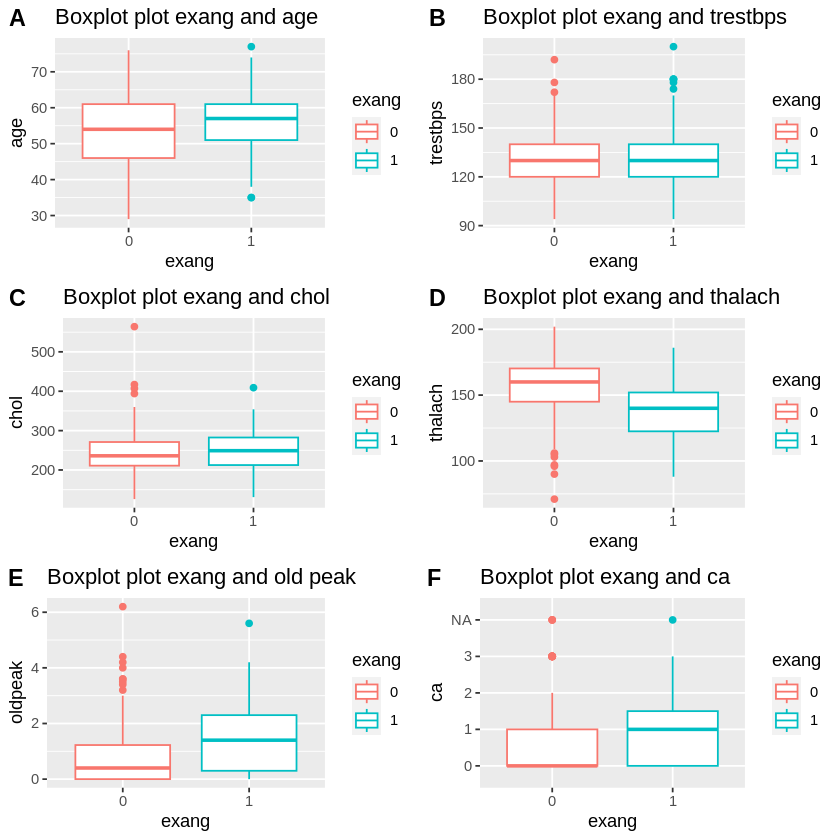

In [ ]:
# Comparing the exang with the other numerical data
A <- ggplot(completedData, aes(x=exang, y=age, group = exang, color = exang)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot exang and age")

B <- ggplot(completedData, aes(x=exang, y=trestbps, group = exang, color = exang)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot exang and trestbps")


C <- ggplot(completedData, aes(x=exang, y=chol, group = exang, color = exang)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot exang and chol")


D <- ggplot(completedData, aes(x=exang, y=thalach, group = exang, color = exang)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot exang and thalach")


E <- ggplot(completedData, aes(x=exang, y=oldpeak, group = exang, color = exang)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot exang and oldpeak")


F_BOX <- ggplot(completedData, aes(x=exang, y=ca, group = exang, color = exang)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot exang and ca")


ggbox_figure_6 <- ggarrange(A, B, C, D, E, F_BOX, 
                            labels = c("A", "B", "C", "D", "E", "F"),
                            ncol = 2, nrow =3)
ggbox_figure_6

2.7 Box plot to see how the numerical vairables behave when dividing them by the slope of teh peak exercise relative to rest.

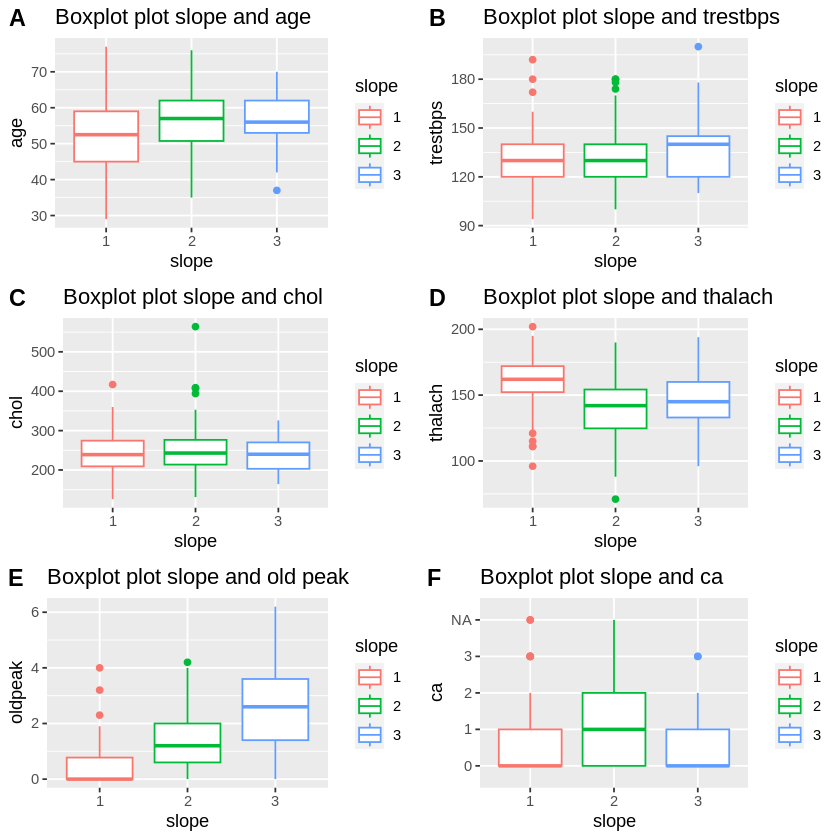

In [ ]:
# Comparing the slope with the other numerical data
A <- ggplot(completedData, aes(x=slope, y=age, group = slope, color = slope)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot slope and age")

B <- ggplot(completedData, aes(x=slope, y=trestbps, group = slope, color = slope)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot slope and trestbps")

C <- ggplot(completedData, aes(x=slope, y=chol, group = slope, color = slope)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot slope and chol")

D <- ggplot(completedData, aes(x=slope, y=thalach, group = slope, color = slope)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot slope and thalach")

E <- ggplot(completedData, aes(x=slope, y=oldpeak, group = slope, color = slope)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot slope and oldpeak")

F_BOX <- ggplot(completedData, aes(x=slope, y=ca, group = slope, color = slope)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot slope and ca")

ggbox_figure_7 <- ggarrange(A, B, C, D, E, F_BOX, 
                            labels = c("A", "B", "C", "D", "E", "F"),
                            ncol = 2, nrow =3)
ggbox_figure_7


2.8 Box plot to see how the numerical vairables behave when dividing them by the thalassemia types. 

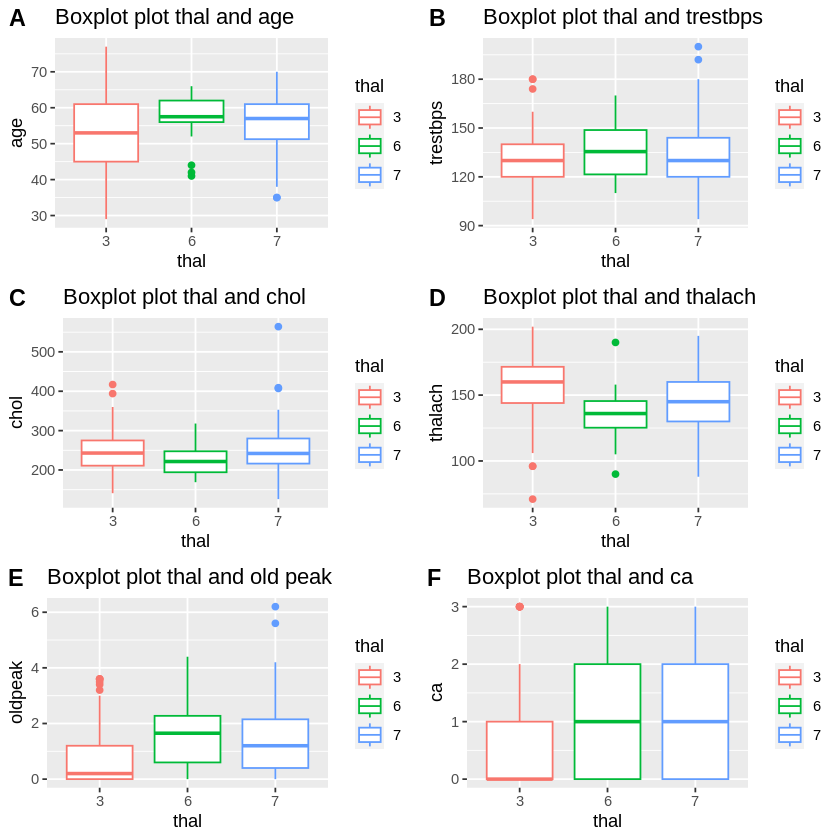

In [ ]:
# Comparing the thal with the other numerical data
A <- ggplot(completedData, aes(x=thal, y=age, group = thal, color = thal)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot thal and age")

B <- ggplot(completedData, aes(x=thal, y=trestbps, group = thal, color = thal)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot thal and trestbps")

C <- ggplot(completedData, aes(x=thal, y=chol, group = thal, color = thal)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot thal and chol")

D <- ggplot(completedData, aes(x=thal, y=thalach, group = thal, color = thal)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot thal and thalach")

E <- ggplot(completedData, aes(x=thal, y=oldpeak, group = thal, color = thal)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot thal and old peak")

F_BOX <- ggplot(completedData, aes(x=thal, y=ca, group = thal, color = thal)) + 
  geom_boxplot() +
  labs(title = "Boxplot plot thal and ca")

ggbox_figure_8 <- ggarrange(A, B, C, D, E, F_BOX, 
                            labels = c("A", "B", "C", "D", "E", "F"),
                            ncol = 2, nrow =3)
ggbox_figure_8

**CONCLUSIONS FROM THE BOX PLOTS**

With these plots it appears that the maximal heart rate attained achieved and the ST depression brought on by exercise relative to rest are both influenced by the presence or absence of a heart condition. Finally, it appears that as people age, the prevalence of cardiac disease tends to rise.

Sex does not appear to have any effect on the numerical variables.

The ST depression induced by exercise relative to rest varies according to the type of chest pain. These variations can also be seen in the number of major vessels coloured by fluoroscopy  and the maximum heart rate achieved.
Regarding the fasting blood sugar higher than 120 mg/dl it doesn't seem to have an impact on the other categorical variables. 

The maximum heart rate achieved appears to be much higher when there is no heart disease. However, this variable affects other categorical variables, including the presence of thalassemia, the slope of the peak exercise ST segment, and exercise-induced angina.

Finally, regarding the ST depression induced by exercise relative to rest, apart from its relation with the with the maximum rate achieved and the type of chest pain, it seems to be related with resting electrocardiographic results and the slope of the peak exercise ST segment. 


3. BAR PLOTS

However, it is also necessary to see the relation between the categorical variables. Therefore, we will perform this bar plots.

3.1 Bar plots to see the relation between the categorical variables and the presence or absence of a heart disease. 

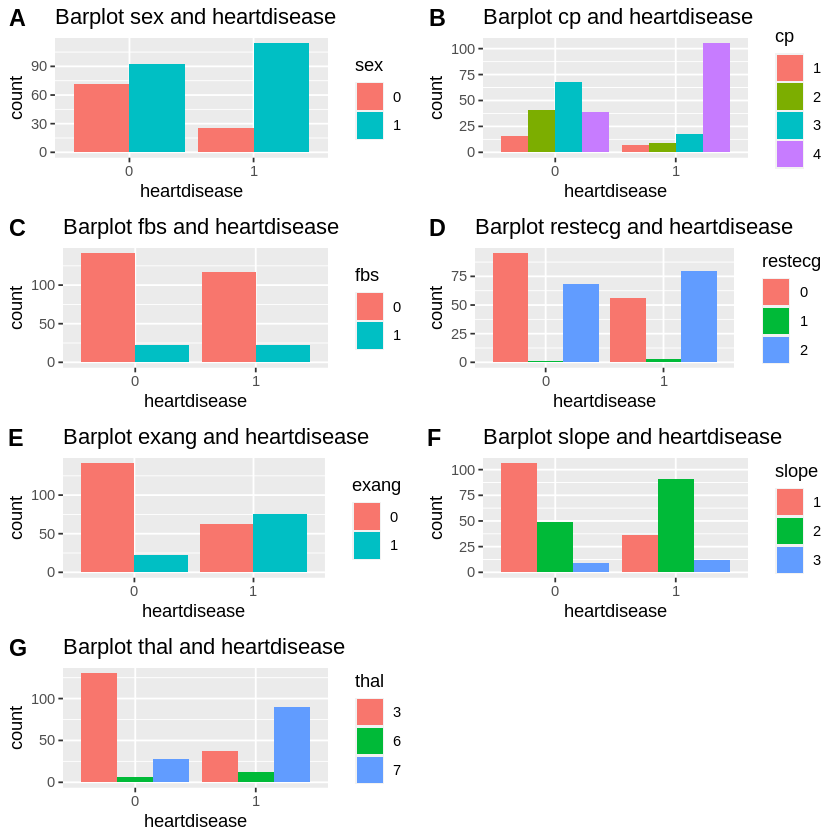

In [ ]:
# THE RELATION WITH THE HEART DISEASE
A <- ggplot(completedData, aes(heartdisease, ..count..)) + geom_bar(aes(fill = sex), position = "dodge")+
  labs(title = "Barplot sex and heartdisease")

B <- ggplot(completedData, aes(heartdisease, ..count..)) + geom_bar(aes(fill = cp), position = "dodge")+
  labs(title = "Barplot cp and heartdisease") 

C <- ggplot(completedData, aes(heartdisease, ..count..)) + geom_bar(aes(fill = fbs), position = "dodge")+
  labs(title = "Barplot fbs and heartdisease")

D <- ggplot(completedData, aes(heartdisease, ..count..)) + geom_bar(aes(fill = restecg), position = "dodge")+
  labs(title = "Barplot restecg and heartdisease")

E <- ggplot(completedData, aes(heartdisease, ..count..)) + geom_bar(aes(fill = exang), position = "dodge")+
  labs(title = "Barplot exang and heartdisease")

F_B <- ggplot(completedData, aes(heartdisease, ..count..)) + geom_bar(aes(fill = slope), position = "dodge")+
  labs(title = "Barplot slope and heartdisease")

G <- ggplot(completedData, aes(heartdisease, ..count..)) + geom_bar(aes(fill = thal), position = "dodge")+
  labs(title = "Barplot thal and heartdisease")

ggbar_figure_1 <- ggarrange(A, B, C, D, E, F_B, G, 
                            labels = c("A", "B", "C", "D", "E", "F", "G"),                     
                            ncol = 2, nrow = 4)
ggbar_figure_1

3.2 Bar plot to see the relation between the categorical variables and someones sex. 

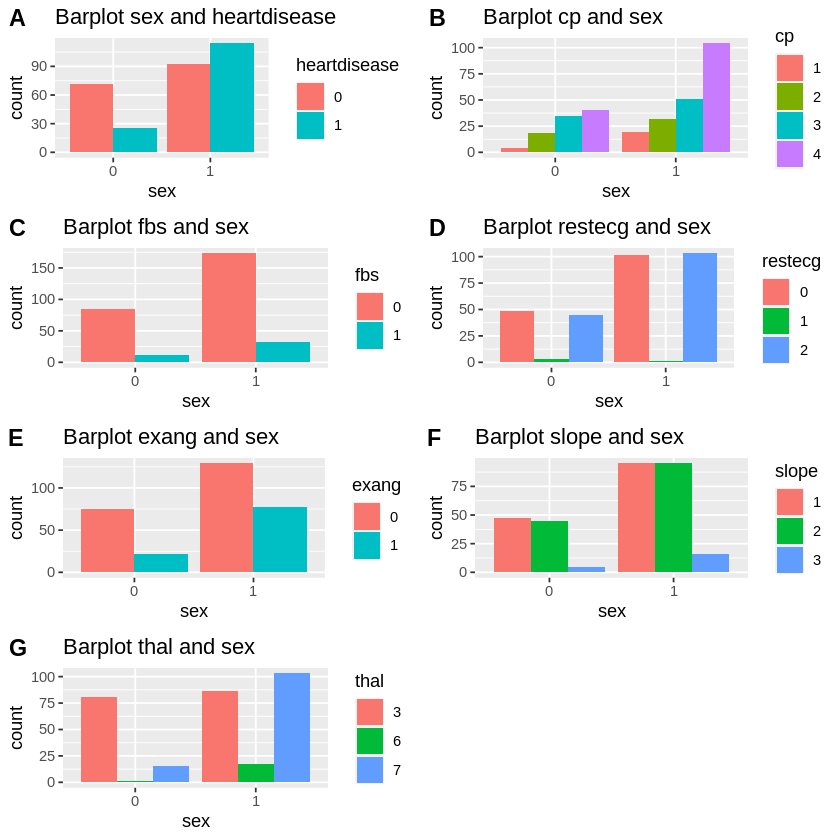

In [ ]:
# THE RELATION WITH THE SEX
A <- ggplot(completedData, aes(sex, ..count..)) + geom_bar(aes(fill = heartdisease), position = "dodge")+
  labs(title = "Barplot sex and heartdisease")

B <- ggplot(completedData, aes(sex, ..count..)) + geom_bar(aes(fill = cp), position = "dodge")+
  labs(title = "Barplot cp and sex")

C <- ggplot(completedData, aes(sex, ..count..)) + geom_bar(aes(fill = fbs), position = "dodge")+
  labs(title = "Barplot fbs and sex")

D <- ggplot(completedData, aes(sex, ..count..)) + geom_bar(aes(fill = restecg), position = "dodge")+
  labs(title = "Barplot restecg and sex")

E <- ggplot(completedData, aes(sex, ..count..)) + geom_bar(aes(fill = exang), position = "dodge")+
  labs(title = "Barplot exang and sex")

F_B <- ggplot(completedData, aes(sex, ..count..)) + geom_bar(aes(fill = slope), position = "dodge")+
  labs(title = "Barplot slope and sex")

G <- ggplot(completedData, aes(sex, ..count..)) + geom_bar(aes(fill = thal), position = "dodge")+
  labs(title = "Barplot thal and sex")

ggbar_figure_2 <- ggarrange(A, B, C, D, E, F_B, G, 
                            labels = c("A", "B", "C", "D", "E", "F", "G"),                     
                            ncol = 2, nrow = 4)
ggbar_figure_2

3.3 Bar plot to see the relation between the categorical variables and the chest pain type. 

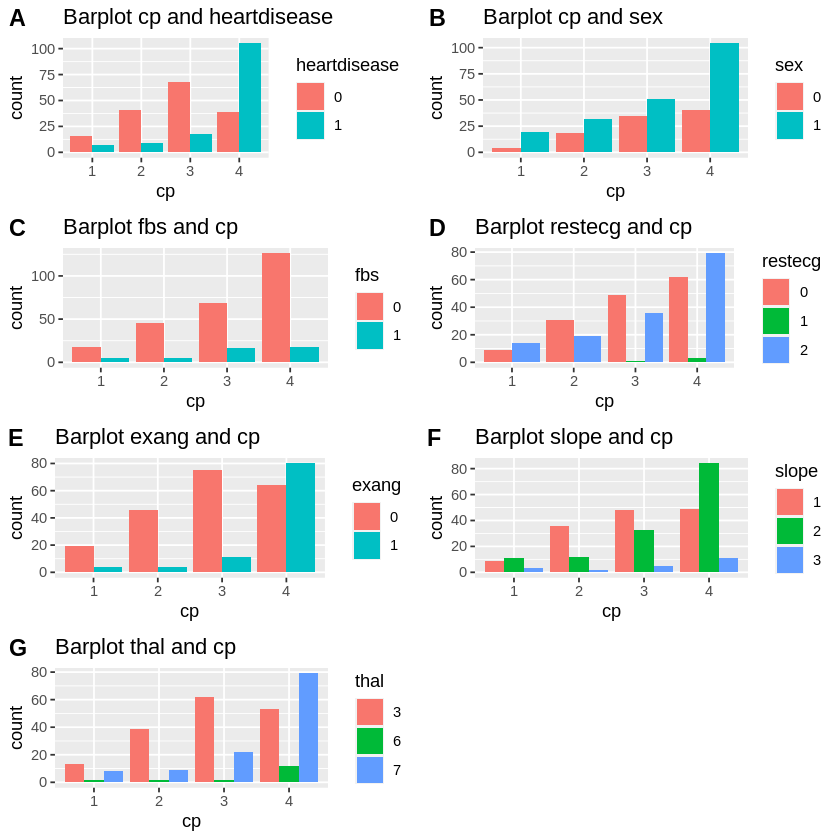

In [ ]:
# THE RELATION WITH THE CP TYPES
A <- ggplot(completedData, aes(cp, ..count..)) + geom_bar(aes(fill = heartdisease), position = "dodge")+
  labs(title = "Barplot cp and heartdisease")

B <- ggplot(completedData, aes(cp, ..count..)) + geom_bar(aes(fill = sex), position = "dodge")+
  labs(title = "Barplot cp and sex")

C <- ggplot(completedData, aes(cp, ..count..)) + geom_bar(aes(fill = fbs), position = "dodge")+
  labs(title = "Barplot fbs and cp")

D <- ggplot(completedData, aes(cp, ..count..)) + geom_bar(aes(fill = restecg), position = "dodge")+
  labs(title = "Barplot restecg and cp")

E <- ggplot(completedData, aes(cp, ..count..)) + geom_bar(aes(fill = exang), position = "dodge")+
  labs(title = "Barplot exang and cp")

F_B <- ggplot(completedData, aes(cp, ..count..)) + geom_bar(aes(fill = slope), position = "dodge")+
  labs(title = "Barplot slope and cp")

G <- ggplot(completedData, aes(cp, ..count..)) + geom_bar(aes(fill = thal), position = "dodge")+
  labs(title = "Barplot thal and cp")

ggbar_figure_3 <- ggarrange(A, B, C, D, E, F_B, G, 
                            labels = c("A", "B", "C", "D", "E", "F", "G"),                     
                            ncol = 2, nrow = 4)
ggbar_figure_3

3.4 Bar plot to see the relation between the categorical variables and the fasting blood sugar higher than 120 mg/dl. 

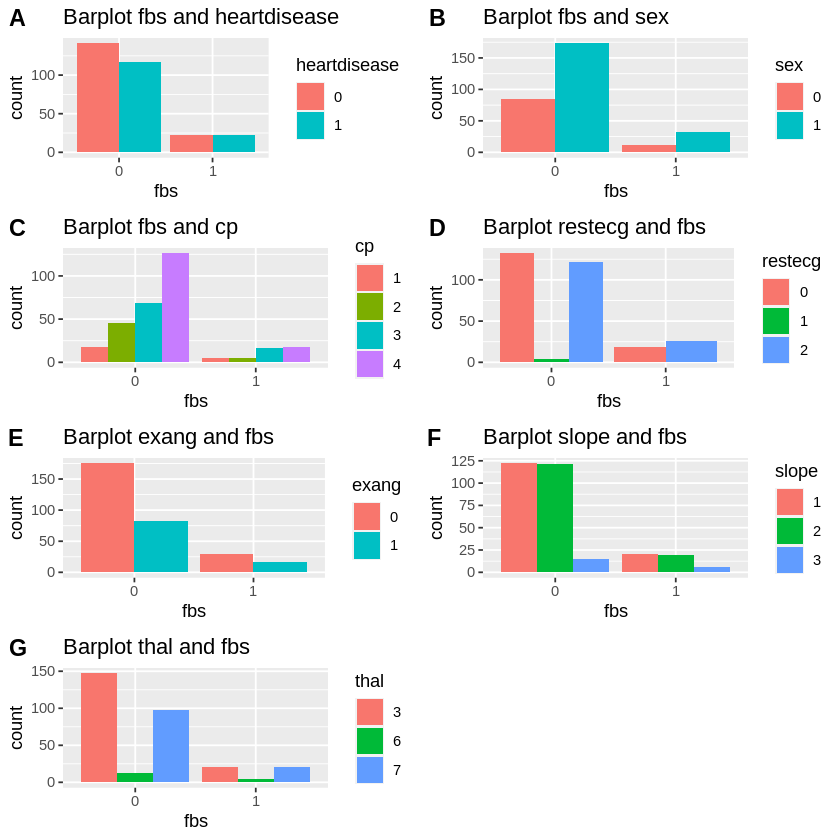

In [ ]:
# THE RELATION WITH THE FBS LEVELS
A <- ggplot(completedData, aes(fbs, ..count..)) + geom_bar(aes(fill = heartdisease), position = "dodge")+
  labs(title = "Barplot fbs and heartdisease")

B <- ggplot(completedData, aes(fbs, ..count..)) + geom_bar(aes(fill = sex), position = "dodge")+
  labs(title = "Barplot fbs and sex")

C <- ggplot(completedData, aes(fbs, ..count..)) + geom_bar(aes(fill = cp), position = "dodge")+
  labs(title = "Barplot fbs and cp")

D <- ggplot(completedData, aes(fbs, ..count..)) + geom_bar(aes(fill = restecg), position = "dodge")+
  labs(title = "Barplot restecg and fbs")

E <- ggplot(completedData, aes(fbs, ..count..)) + geom_bar(aes(fill = exang), position = "dodge")+
  labs(title = "Barplot exang and fbs")

F_B <- ggplot(completedData, aes(fbs, ..count..)) + geom_bar(aes(fill = slope), position = "dodge")+
  labs(title = "Barplot slope and fbs")

G <- ggplot(completedData, aes(fbs, ..count..)) + geom_bar(aes(fill = thal), position = "dodge")+
  labs(title = "Barplot thal and fbs")

ggbar_figure_4 <- ggarrange(A, B, C, D, E, F_B, G, 
                            labels = c("A", "B", "C", "D", "E", "F", "G"),                     
                            ncol = 2, nrow = 4)
ggbar_figure_4

3.5 Bar plot to see the relation between the categorical variables and the resting electrocardiographic results. 

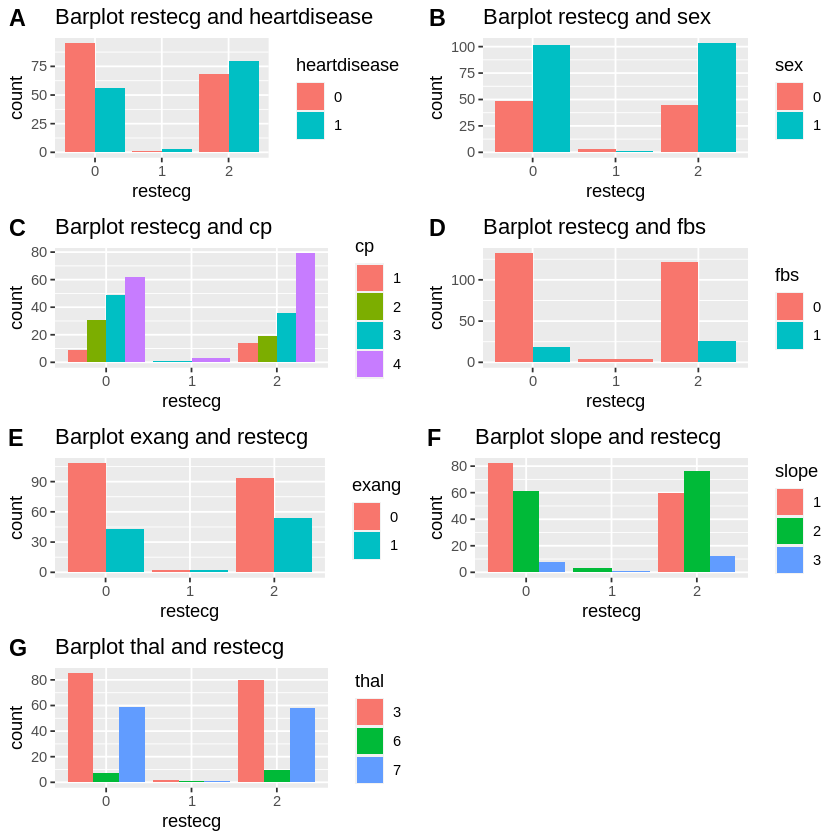

In [ ]:
# THE RELATION WITH THE RESTECG LEVELS
A <- ggplot(completedData, aes(restecg, ..count..)) + geom_bar(aes(fill = heartdisease), position = "dodge")+
  labs(title = "Barplot restecg and heartdisease")

B <- ggplot(completedData, aes(restecg, ..count..)) + geom_bar(aes(fill = sex), position = "dodge")+
  labs(title = "Barplot restecg and sex")

C <- ggplot(completedData, aes(restecg, ..count..)) + geom_bar(aes(fill = cp), position = "dodge")+
  labs(title = "Barplot restecg and cp")

D <- ggplot(completedData, aes(restecg, ..count..)) + geom_bar(aes(fill = fbs), position = "dodge")+
  labs(title = "Barplot restecg and fbs")

E <- ggplot(completedData, aes(restecg, ..count..)) + geom_bar(aes(fill = exang), position = "dodge")+
  labs(title = "Barplot exang and restecg")

F_B <- ggplot(completedData, aes(restecg, ..count..)) + geom_bar(aes(fill = slope), position = "dodge")+
  labs(title = "Barplot slope and restecg")

G <- ggplot(completedData, aes(restecg, ..count..)) + geom_bar(aes(fill = thal), position = "dodge")+
  labs(title = "Barplot thal and restecg")

ggbar_figure_5 <- ggarrange(A, B, C, D, E, F_B, G, 
                            labels = c("A", "B", "C", "D", "E", "F", "G"),                     
                            ncol = 2, nrow = 4)
ggbar_figure_5

3.6 Bar plot to see the relation between the categorical variables and the exercise induced angina. 

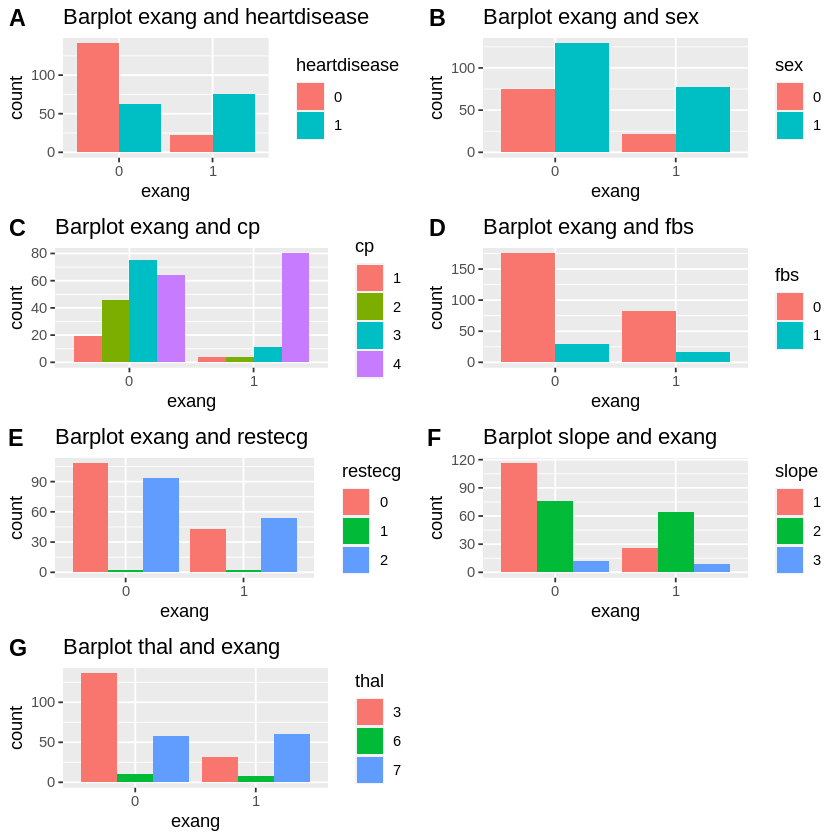

In [ ]:
# THE RELATION WITH THE EXANG LEVELS
A <- ggplot(completedData, aes(exang, ..count..)) + geom_bar(aes(fill = heartdisease), position = "dodge")+
  labs(title = "Barplot exang and heartdisease")

B <- ggplot(completedData, aes(exang, ..count..)) + geom_bar(aes(fill = sex), position = "dodge")+
  labs(title = "Barplot exang and sex")

C <- ggplot(completedData, aes(exang, ..count..)) + geom_bar(aes(fill = cp), position = "dodge")+
  labs(title = "Barplot exang and cp")

D <- ggplot(completedData, aes(exang, ..count..)) + geom_bar(aes(fill = fbs), position = "dodge")+
  labs(title = "Barplot exang and fbs")

E <- ggplot(completedData, aes(exang, ..count..)) + geom_bar(aes(fill = restecg), position = "dodge")+
  labs(title = "Barplot exang and restecg")

F_B <- ggplot(completedData, aes(exang, ..count..)) + geom_bar(aes(fill = slope), position = "dodge")+
  labs(title = "Barplot slope and exang")

G <- ggplot(completedData, aes(exang, ..count..)) + geom_bar(aes(fill = thal), position = "dodge")+
  labs(title = "Barplot thal and exang")

ggbar_figure_6 <- ggarrange(A, B, C, D, E, F_B, G, 
                            labels = c("A", "B", "C", "D", "E", "F", "G"),                     
                            ncol = 2, nrow = 4)
ggbar_figure_6

3.7 Bar plot to see the relation between the categorical variables and the slope of the peak exercise ST segment. 

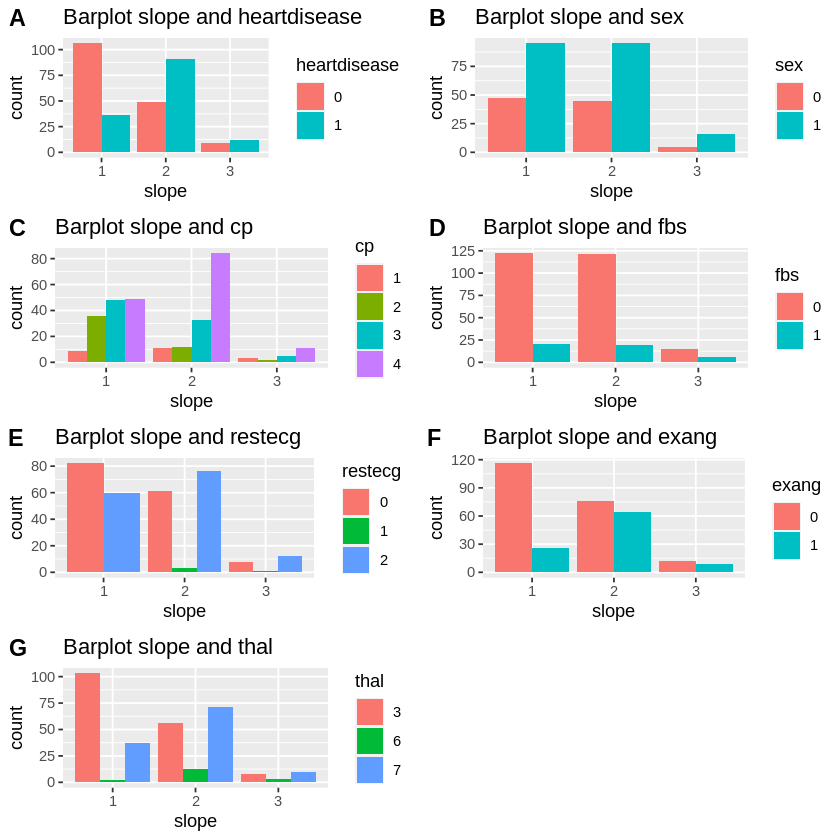

In [ ]:
# THE RELATION WITH THE SLOPE LEVELS
A <- ggplot(completedData, aes(slope, ..count..)) + geom_bar(aes(fill = heartdisease), position = "dodge")+
  labs(title = "Barplot slope and heartdisease")

B <- ggplot(completedData, aes(slope, ..count..)) + geom_bar(aes(fill = sex), position = "dodge")+
  labs(title = "Barplot slope and sex")

C <- ggplot(completedData, aes(slope, ..count..)) + geom_bar(aes(fill = cp), position = "dodge")+
  labs(title = "Barplot slope and cp")

D <- ggplot(completedData, aes(slope, ..count..)) + geom_bar(aes(fill = fbs), position = "dodge")+
  labs(title = "Barplot slope and fbs")

E <- ggplot(completedData, aes(slope, ..count..)) + geom_bar(aes(fill = restecg), position = "dodge")+
  labs(title = "Barplot slope and restecg")

F_B <- ggplot(completedData, aes(slope, ..count..)) + geom_bar(aes(fill = exang), position = "dodge")+
  labs(title = "Barplot slope and exang")

G <- ggplot(completedData, aes(slope, ..count..)) + geom_bar(aes(fill = thal), position = "dodge")+
  labs(title = "Barplot slope and thal")

ggbar_figure_6.2 <- ggarrange(A, B, C, D, E, F_B, G, 
                            labels = c("A", "B", "C", "D", "E", "F", "G"),                     
                            ncol = 2, nrow = 4)
ggbar_figure_6.2

3.8 Bar plot to see the relation between the categorical variables and the thalassemia types. 

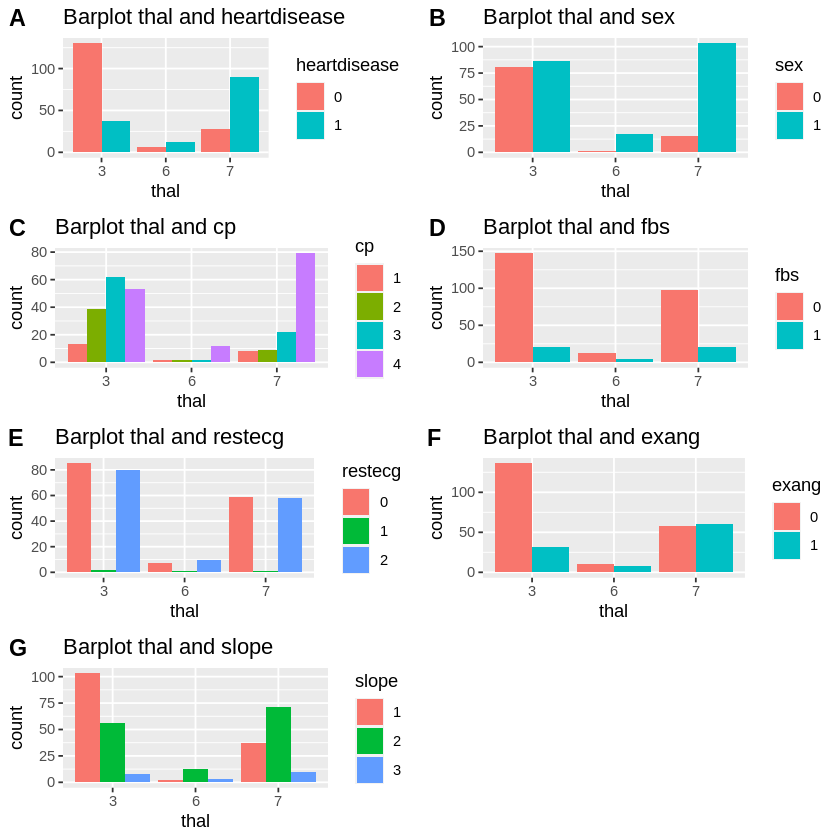

In [ ]:
# THE RELATION WITH THE THAL TYPES

A <- ggplot(completedData, aes(thal, ..count..)) + geom_bar(aes(fill = heartdisease), position = "dodge")+
  labs(title = "Barplot thal and heartdisease")

B <- ggplot(completedData, aes(thal, ..count..)) + geom_bar(aes(fill = sex), position = "dodge")+
  labs(title = "Barplot thal and sex")

C <- ggplot(completedData, aes(thal, ..count..)) + geom_bar(aes(fill = cp), position = "dodge")+
  labs(title = "Barplot thal and cp")

D <- ggplot(completedData, aes(thal, ..count..)) + geom_bar(aes(fill = fbs), position = "dodge")+
  labs(title = "Barplot thal and fbs")

E <- ggplot(completedData, aes(thal, ..count..)) + geom_bar(aes(fill = restecg), position = "dodge")+
  labs(title = "Barplot thal and restecg")

F_B <- ggplot(completedData, aes(thal, ..count..)) + geom_bar(aes(fill = exang), position = "dodge")+
  labs(title = "Barplot thal and exang")

G <- ggplot(completedData, aes(thal, ..count..)) + geom_bar(aes(fill = slope), position = "dodge")+
  labs(title = "Barplot thal and slope")

ggbar_figure_6.3 <- ggarrange(A, B, C, D, E, F_B, G, 
                              labels = c("A", "B", "C", "D", "E", "F", "G"),                     
                              ncol = 2, nrow = 4)
ggbar_figure_6.3

**CONCLUSIONS FROM THE BAR PLOTS**

In the previous graphs, we can see that those suffering from a heart illness are more likely to be men than women; however, in the group without any form of heart disease, there aren't any obvious variations between the representation of the two sexes. Additionally, it appears that those who do not have a heart condition are less likely to experience level 1 chest pain. Furthermore, those who have heart disease experience higher level 4 chest pain than those who do not.

Moreover, we can observe that exercise-induced angina type 1 is significantly more common than type 0 in the presence of a cardiac condition.
Additionally,  the slope of the peak exercise ST segment type 1 is decreased in people who have heart disease, although the types 2 and 3 are relatively unaffected. When thalassemia is taken into account, we can see that the type 3 is actually decreased with the existence of a cardiac condition, however the type 7 is enhanced.

When comparing the two sexes, we can find that men are more likely than women to have thalassemia types 6 and 7. The categories 1 and 2 of the slope of the peak exercise ST segment appear to be substantially higher in man . Also greater in men than in women are fasting blood sugar levels of above 120 ml/dl, chest pain levels of 4 and 2, and resting electrocardiographic values of 0 and 2.

Aside from the differences between the sexes and the presence of a cardiac condition, we may detect variances between the various fasting blood sugar levels higher than 120 mg/dl when considering the type of chest paint (when the level 1 is mainly maintained, but the level 0 increases as the chain paint increases).

When comparing chest pain and resting electrocardiographic results, certain variations can be seen when type 1 resting electrocardiographic results has only chest pain levels 3 and 4.   Additionally, the electrographic results 0 and 2 rise in these two levels. Furthermore, when the slope of the peak exercise ST segment 2 is increased, certain variations in the chest paint level 4 are seen. The presence of thalassemia 7 is also more prevalent in the level 4 of chest pain. 

In relation to the exercise-induced angina, in addition to the previous observations, we can observe that  in the type 0 a fasting blood sugar  above 120 ml/dg level 0  is significantly greater than the level 1. Although exercise-induced angina type 1 lowers fasting blood sugar levels above 120 mg/l level 1, this depletion is less severe. We can see that level 1 is reduced in the slope of the peak exercise ST segments 1 and 2 when the fasting blood sugar is higher than 120 mg/dl. Additionally, this level is decreased when thalassemia types 3 and 7 are present. It's interesting to note that in fasting blood sugar higher than 120 mg/dl level 1 the resting electrocardiographic results are not present.


Regarding this last variable, the resting electrocardiographic results, we can see that type I is not present in the slope of the peak exercise ST segment 1. And that the type II is interestingly reduced in the thalassemia type 3.


Finally, in addition to the findings already discussed, it was also found that exercise-induced angina level 1 is significantly reduced in women but not in males. Additionally, when looking at the outcomes of the exercise-induced angina,   the slope of the level 1 peak exercise ST segment declines at level 1. The prevalence of thalassemia type 3 is also significantly decreased at this level.


4. SCATTER PLOT

Finally we will perform some scatter plots in order to see the relatioship between two numerical variables.

4.1 Scatter plots to see the relation between the numerical data and age.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour, fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour, fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour, fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a f

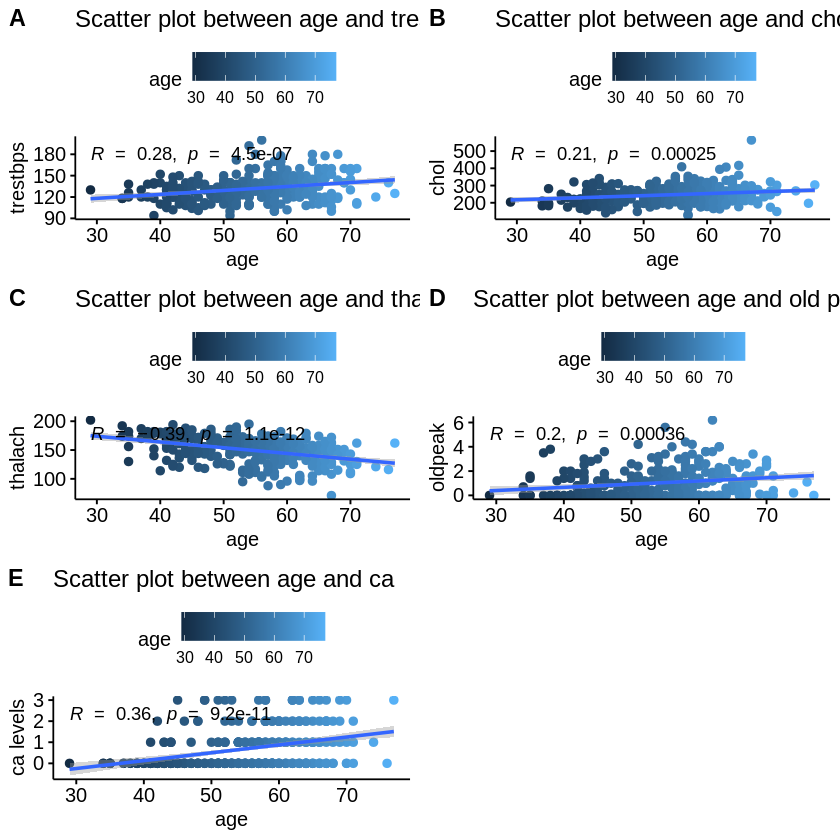

In [ ]:
SA_1<- ggscatter(completedData, x = "age", y = "trestbps", color = "age",
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "age", ylab = "trestbps") +
      labs(title = "Scatter plot between age and trestbps")


SA_2 <- ggscatter(completedData, x = "age", y = "chol", color = "age",
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "age", ylab = "chol") +
  labs(title = "Scatter plot between age and chol")


SA_3 <- ggscatter(completedData, x = "age", y = "thalach", color  = "age",
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "age", ylab = "thalach") +
  labs(title = "Scatter plot between age and thalach")


SA_4 <- ggscatter(completedData, x = "age", y = "oldpeak", color = "age",
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "age", ylab = "oldpeak")+
  labs(title = "Scatter plot between age and old peak")


SA_5 <- ggscatter(completedData, x = "age", y = "ca", color = "age",
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "age", ylab = "ca levels") +
  labs(title = "Scatter plot between age and ca")



ggscat_figure_1 <- ggarrange(SA_1, SA_2, SA_3, SA_4, SA_5, 
          labels = c("A", "B", "C", "D", "E"),
          ncol = 2, nrow =3)
ggscat_figure_1

4.2 Scatter plots to see the relation between the numerical data and the resting blood pressure un mmHg.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour, fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour, fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour, fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a f

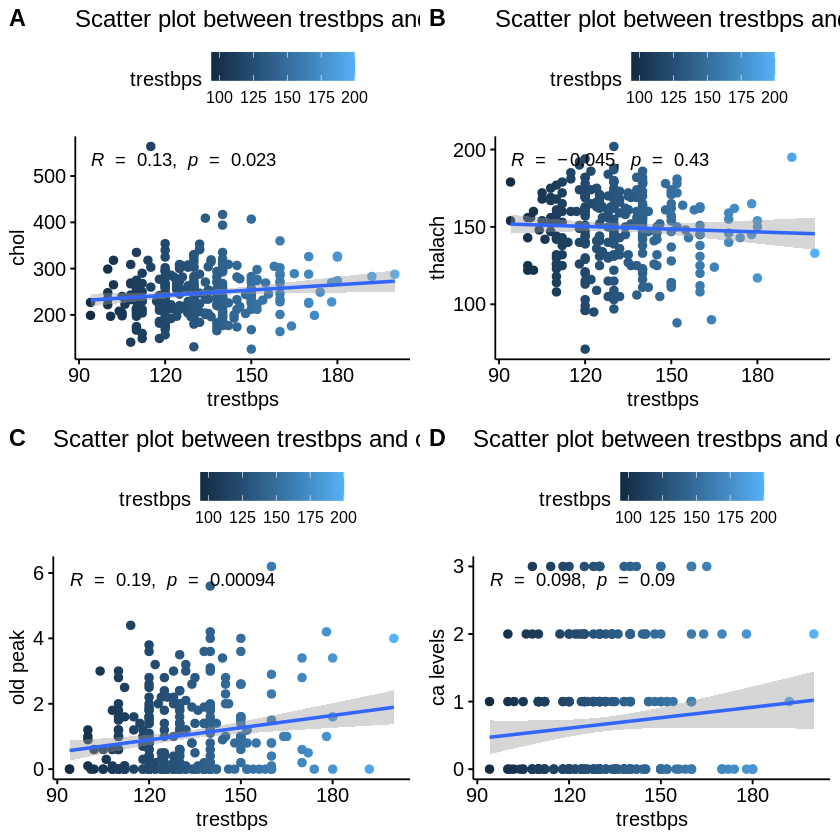

In [ ]:
SA_1<- ggscatter(completedData, x = "trestbps", y = "chol", color = "trestbps",
                 add = "reg.line", conf.int = TRUE, 
                 cor.coef = TRUE, cor.method = "pearson",
                 xlab = "trestbps", ylab = "chol") + 
  labs(title = "Scatter plot between trestbps and chol")

SA_2<- ggscatter(completedData, x = "trestbps", y = "thalach", color = "trestbps",
                 add = "reg.line", conf.int = TRUE, 
                 cor.coef = TRUE, cor.method = "pearson",
                 xlab = "trestbps", ylab = "thalach") + 
  labs(title = "Scatter plot between trestbps and thalach")


SA_3<- ggscatter(completedData, x = "trestbps", y = "oldpeak", color = "trestbps",
                 add = "reg.line", conf.int = TRUE, 
                 cor.coef = TRUE, cor.method = "pearson",
                 xlab = "trestbps", ylab = "old peak") +
  labs(title = "Scatter plot between trestbps and old peak")


SA_4<- ggscatter(completedData, x = "trestbps", y = "ca",  color = "trestbps",
                 add = "reg.line", conf.int = TRUE, 
                 cor.coef = TRUE, cor.method = "pearson",
                 xlab = "trestbps", ylab = "ca levels") + 
  labs(title = "Scatter plot between trestbps and ca")




ggscat_figure_2 <- ggarrange(SA_1, SA_2, SA_3, SA_4,
          labels = c("A", "B", "C", "D"),
          ncol = 2, nrow =2)
ggscat_figure_2

4.3 Scatter plots to see the relation between the numerical data and the serum cholesterol in mg/dl.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour, fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour, fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour, fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a f

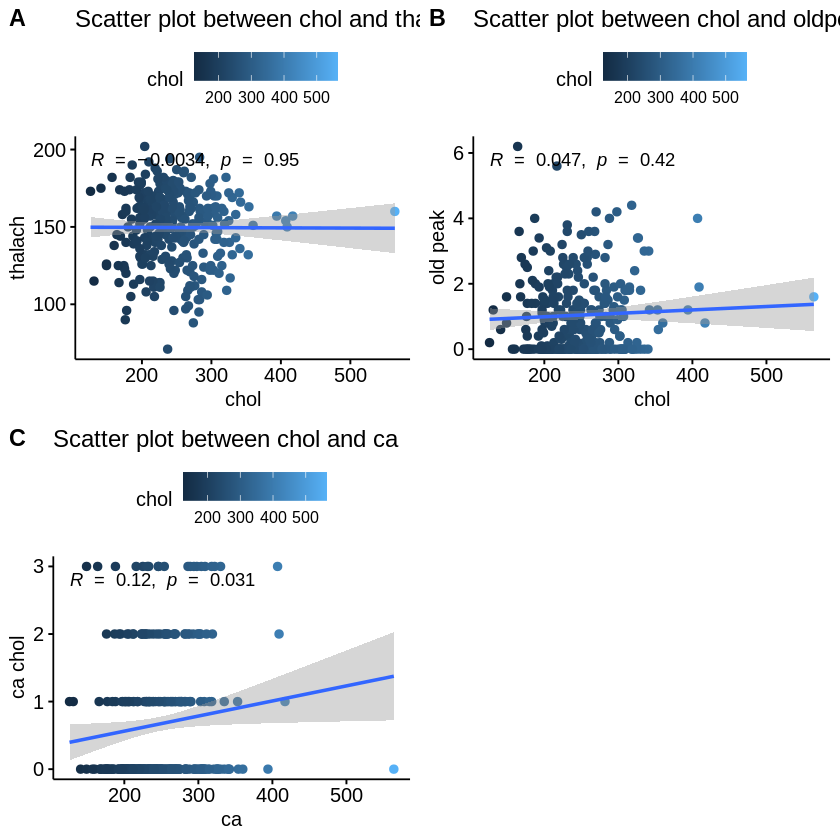

In [ ]:
SA_1 <- ggscatter(completedData, x = "chol", y = "thalach", color = "chol",
                 add = "reg.line", conf.int = TRUE, 
                 cor.coef = TRUE, cor.method = "pearson",
                 xlab = "chol", ylab = "thalach") +
  labs(title = "Scatter plot between chol and thalach")

SA_2 <- ggscatter(completedData, x = "chol", y = "oldpeak", color = "chol", 
                 add = "reg.line", conf.int = TRUE, 
                 cor.coef = TRUE, cor.method = "pearson",
                 xlab = "chol", ylab = "old peak") +
  labs(title = "Scatter plot between chol and oldpeak")


SA_3 <- ggscatter(completedData, x = "chol", y = "ca", color = "chol",
                 add = "reg.line", conf.int = TRUE, 
                 cor.coef = TRUE, cor.method = "pearson",
                 xlab = "ca", ylab = "ca chol") +
  labs(title = "Scatter plot between chol and ca")

ggscat_figure_3 <- ggarrange(SA_1, SA_2, SA_3,
          labels = c("A", "B", "C"),
          ncol = 2, nrow =2)
ggscat_figure_3

4.4 Scatter plots to see the relation between the numerical data and themaximum heart rate achieved.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour, fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour, fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour, fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a f

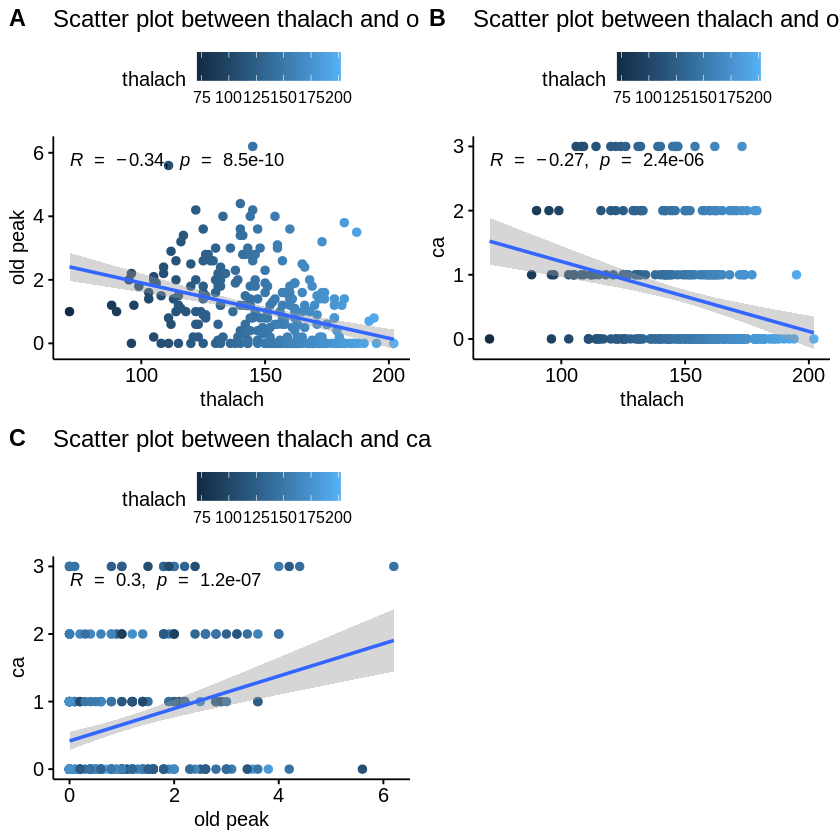

In [ ]:
SA_1 <- ggscatter(completedData, x = "thalach", y = "oldpeak", color = "thalach",
                 add = "reg.line", conf.int = TRUE, 
                 cor.coef = TRUE, cor.method = "pearson",
                 xlab = "thalach", ylab = "old peak") +
  labs(title = "Scatter plot between thalach and old peak")


SA_2 <- ggscatter(completedData, x = "thalach", y = "ca", color = "thalach", 
                 add = "reg.line", conf.int = TRUE, 
                 cor.coef = TRUE, cor.method = "pearson",
                 xlab = "thalach", ylab = "ca") +
  labs(title = "Scatter plot between thalach and old ca")


SA_3 <- ggscatter(completedData, x = "oldpeak", y = "ca", color = "thalach",
                  add = "reg.line", conf.int = TRUE, 
                  cor.coef = TRUE, cor.method = "pearson",
                  xlab = "old peak", ylab = "ca") +
  labs(title = "Scatter plot between thalach and ca")

ggscat_figure_2 <- ggarrange(SA_1, SA_2, SA_3,
          labels = c("A", "B", "C", "D"),
          ncol = 2, nrow =2)
ggscat_figure_2



**CONCLUSIONS FROM THE SCATTER PLOTS**

Given that the blood pressure appears to increase as age increases, we can infer from the preceding plots that there is a positive relationship between age and resting blood pressure.

Additionally, there is a propensity for an effect between age and the maximum heart rate achieved. In this situation, we should establish a negative association; as a result, the maximum heart rate reached decreases with increasing age.

Additionally, an increasing serum cholesterol in mg/dl appears to be correlated with age.

The regression line, however, is not particularly close to the varied values. As a result, in none of the earlier situations, we can assume a clear link between the two variables.


# **FINAL** **CONCLUSIONS**

After performing all the previous plots in order to see which are the variables which tending to differ more in presence or absence of a heart disease, when comparing the data between the different ages in a box plot, we can see that they don't appear to be significantly different, but rather show a tendency.   Additionally, we can observe that individuals with cardiac disorders also have a propensity for their maximum heart rates to decline.

Since the blood pressure seems to grow as age increases, we can infer from the preceding plots that there is a positive relationship between age and resting blood pressure. Additionally, there is a direct correlation between age and higher serum cholesterol (measured in mg/dl). Additionally, we found a trend for a negative association between age and the highest heart rate obtained, with the maximum heart rate achieved decreasing with increasing age.

When comparing the many types of chest pain in people with and without heart illness, it is found that types 1, 2, and 3 are more common without a heart condition. However, type 4 is significantly more prevalent in those who have cardiac disease. Additionally, given the level 0 of the ST depression is significantly more common in the second kind of chest pain than in the other types, it appears that the ST depression induced by exercise relative to rest level may have a tendency to be connected with the chest pain.Comparatively, as the slope 2 is significantly higher in type 4 chest pain than in the other types, it seems that  the slope of the peak caused by exercise relative to rest  is related to the chest pain. Finally, because type 4 chest pain is more prevalent than the other three in type 1 exercise-induced angina, it seems to be a connection between chest pain and this condition.

Interestingly, the maximum heart rate reached appears to be related to the resting electrocardiographic results, as shown by the fact that the maximum heart rate is much lower in type 1 resting electrocardiographic data in both the density plots and box plots.

The slope of the peak exercise ST segment appears to be affected by the existence of a heart disease, since slope 1 is markedly lowered in those with a heart condition, but slope 2 appears to increase noticeably in this group. Moreover, this slope seems to be related to the resting electrocardiographic results, since the type 1 of these results is not present in the slope type 1. Besides, the slope type 3 has really low values of any of these results. 

Since type of thalassemia 7 is significantly raised and type 3 is significantly lowered in the presence of a cardiac illness, it appears that the type of thalassemia is also influenced by this condition. Additionally, it appears that the type of thalassemia affects the highest rate achieved because the distribution of the data is different in density plots and in box plots the  type 6 thalassemia has a substantially lower maximum rate achieved than type 3 thalassemia. The type of thalassemia also appears to have an impact on the slope of the peak workout ST segment, since type 3 is significantly higher than the other two in slope 1 and significantly lowers in slope 2, where type 7 is higher than the other two.

Given that men represent a greater percentage part of the population than women among those who have heart disease, it appears that differences between the two sexes may play a factor in the development of a heart disease. Additionally, sex appears to have an effect on the maximum rate achieved, since the peak of the women appears to be significantly higher than the ones of the men in the density plots. However, when examining the box plots, we can see that while it is true,  it does not appear to be significantly different. Moreover, it seems that sex has an impact on the resting electrocardiographic results  as well. The slope of the peak exercise ST segment appears to be influenced by a person's sex, as all the slopes, specifically slopes 1 and 2, are substantially higher in men than in women.

By analysing these plots, we can see that the level of exercise-induced angina also varies according to the existence of heart disease, with level 0 appearing to be reduced to half among people suffering from a heart disease,  while level 1 appears to grow by the same percentage. Additionally, it appears that exercise-induced angina affects the maximum heart rate achieved because type 0 heart rate is considerably more common in type 0 exercise-induced angina.Furthermore, since both plots (the box plot and the density plot) show that in the type 0 of exercise-induced angina, the level 1 of the number of major vessels coloured by fluoroscopy is much more common, it seems that the number of major vessels coloured by fluoroscopy vary according to the exercise induced angina  Finally, since the the ST depression induced by exercise relative to rest level 0 is significantly more prevalent in the type 0 of exercise-induced angina, this other variable appears to be altered by the exercise-induced angina. Additionally, exercise-induced angina affects the slope of the peak exercise ST segment, as slope 1 has a substantially higher exercise-induced level 0 than the other two slopes, which seem to be stabilized. 

Fasting blood sugar levels over 120 mg/dl and the number of major vessels coloured by fluoroscopy appear to be associated. Furthermore, given that the resting electrocardiographic results have a higher fasting blood sugar levels over 120 mg/dl from level 0, they  appear to be related. Additionally, the second category of resting electrocardiographic data does not show a level 1 of fasting blood sugar greater than 120 mg/dl. Since both forms of fasting blood sugar are higher than 120 mg/dl, but primarily type 0 is substantially higher in men, this variable is also sex-related. Fasting blood sugar levels greater than 120 mg/dl are also associated with the type of thalassemia, with type 3 having substantially higher level 0 fasting blood sugar levels than the other two types of thalassemia do.
